# Sommaire

1. ## Import
    - ## Import de la librairie Pandas
    - ## Import du fichier : billets.csv

2. ## Nettoyage du DataFrame
   - ## Traitement des valeurs manquantes : Méthode(1) "StatsModel" & Méthode(2) "Manuelle" 
     
3. ## Exploration du DataFrame
    - ## Distribution des variables avec histogram
    - ## Visualisation de deux variables avec pairplot 
    - ## Boxplot des variables par vrais ou faux billets
    - ## Standardisation des données
     
5. ## ACP, CAH & K-Means clustering

6. ## Prédiction des billets (4 algorithmes)  
    - ## Régression logistique
    - ## K-Means
    - ## KNN
    - ## Random Forest

In [2]:
# Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets
from sklearn import decomposition, preprocessing
sns.set()
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1. Importation du fichier : billet.csv"</h2>
</div>

In [4]:
# Importation du fichier billets.csv

df = pd.read_csv("Data/billets.csv",sep=';')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. Exploration du DataFrame</h2>
</div>

In [6]:
df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [8]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [9]:
df.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

<Axes: >

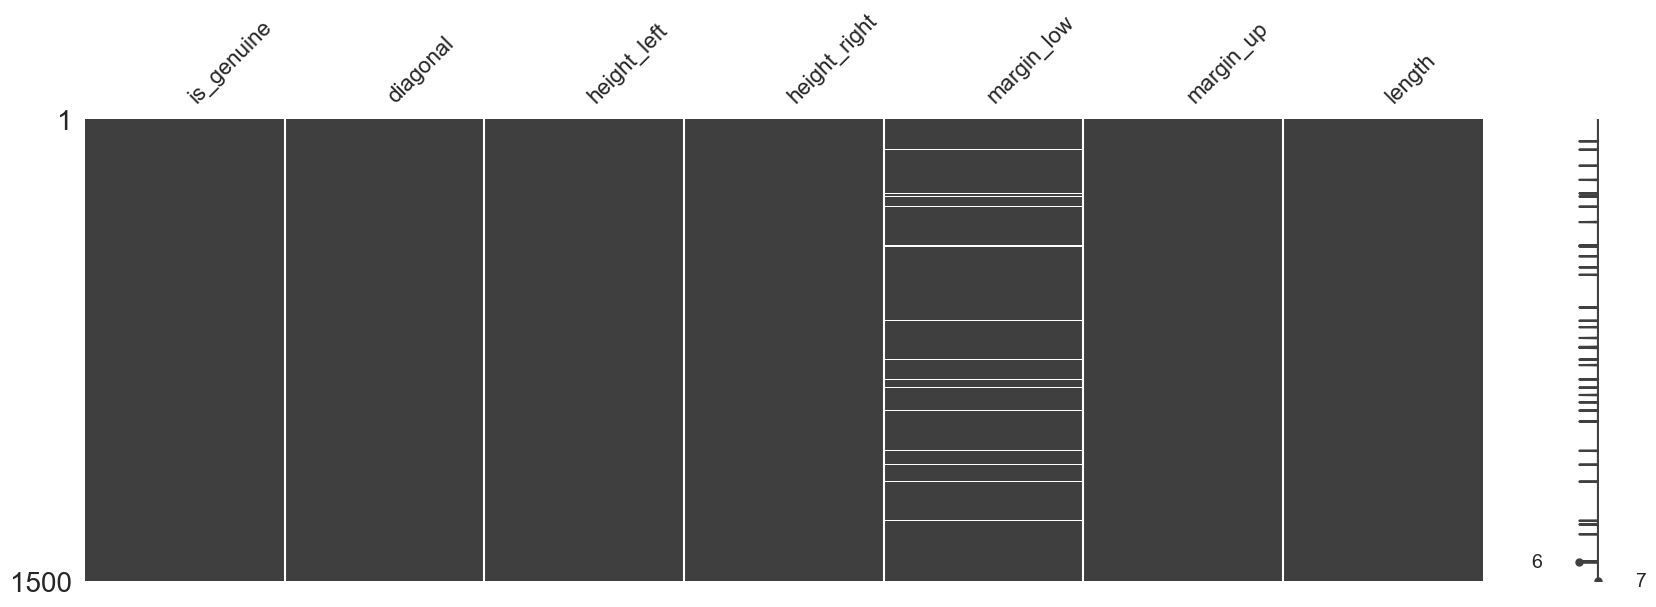

In [10]:
# Visualiser le DF en utilisant le package missingno, on dessine une matrice de nullité

msno.matrix(df, figsize = (20, 6))

In [11]:
# On zoome pour voir combien de valeurs manquants

df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [12]:
df.is_genuine.value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [13]:
# Affichage du nombre des vrais et faux billets

print("Nombre de vrai billets est : ", df.loc[df.is_genuine == True, "is_genuine"].count())
print("Nombre de vrai billets est : ", df.loc[df.is_genuine == False, "is_genuine"].count())

Nombre de vrai billets est :  1000
Nombre de vrai billets est :  500


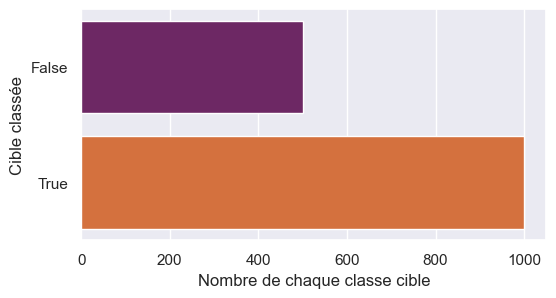

In [14]:
plt.figure(figsize = (6, 3)) 
sns.countplot(y= df.is_genuine,data=df, palette = "inferno")
plt.xlabel("Nombre de chaque classe cible")
plt.ylabel("Cible classée")
plt.show()

In [15]:
# Aperçu des lignes où les billets sont vrais

vrai_billets = df.loc[df.is_genuine == True]
vrai_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
1          True    171.46       103.36        103.66        3.77       2.99   
2          True    172.69       104.48        103.50        4.40       2.94   
3          True    171.36       103.91        103.94        3.62       3.01   
4          True    171.73       104.28        103.46        4.04       3.48   
..          ...       ...          ...           ...         ...        ...   
995        True    171.66       103.92        103.47        4.26       2.83   
996        True    172.16       103.72        103.61        4.30       2.72   
997        True    171.78       103.38        104.22        4.23       3.07   
998        True    171.44       103.96        103.92        3.68       2.89   
999        True    171.56       104.07        103.58        3.55       3.02   

     length  
0    112.83  
1    113.09  
2    113.16  
3    113.51  
4    112.54  
..      ...  
995  113.20  
996  113.51  
997  113.77  
998  113.21  
999  112.96  

[1000 rows x 7 columns]

In [16]:
vrai_billets.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [17]:
# Aperçu des lignes où les billets sont faux 

faux_billets = df.loc[df.is_genuine == False]
faux_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1000       False    172.28       103.95        103.91        4.78       3.31   
1001       False    171.92       103.86        104.30        4.96       3.13   
1002       False    171.59       104.14        104.38        4.97       3.47   
1003       False    172.02       104.33        104.33        5.19       3.21   
1004       False    172.55       104.25        104.23        5.60       3.13   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
1000  111.40  
1001  111.29  
1002  111.22  
1003  111.99  
1004  111.72  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[500 rows x 7 columns]

In [18]:
faux_billets.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Nettoyage du DataFrame</h2>
</div>

# Imputation des Nan en utilisant la Régression Linéare (2 méthodes)

Durant l'exploration des données, nous avons constaté qu'il y avait des valeurs manquantes dans la colonne "margin_low".
Nous allons "prédire" ces données à l'aide d'un model de Machine Learning (La Régression Linéaire)

### Vérification d'une relation linéaire entre les variables indépendantes et la variable à prédire

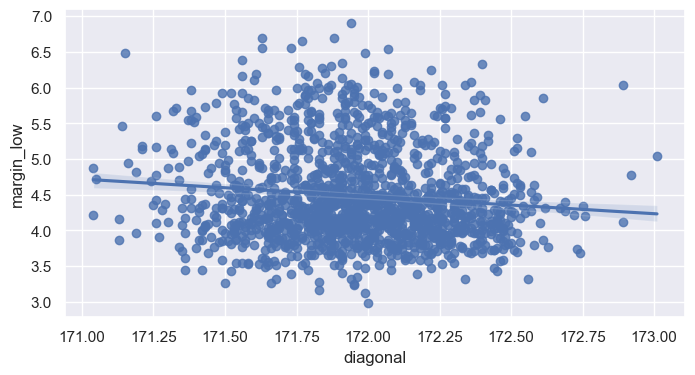

In [23]:
# diagonal v margin_low

plt.figure(figsize = (8, 4)) 
sns.regplot(x="diagonal", y="margin_low", data=df)
plt.show()

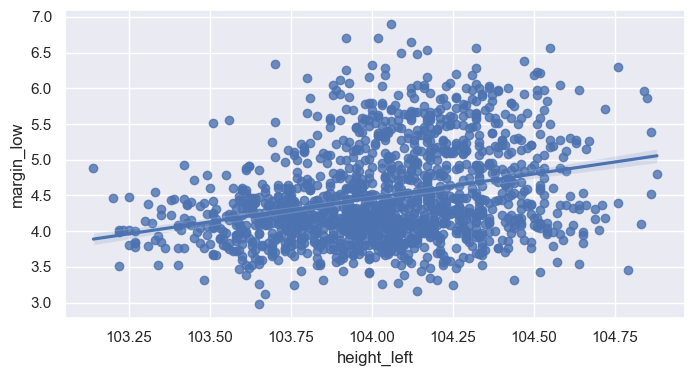

In [24]:
# height_left v margin_low

plt.figure(figsize = (8, 4)) 
sns.regplot(x="height_left", y="margin_low", data=df)
plt.show()

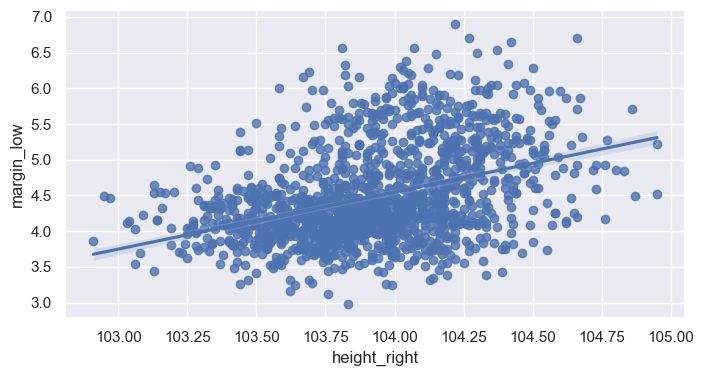

In [25]:
# height_right v margin_low

plt.figure(figsize = (8, 4)) 
sns.regplot(x="height_right", y="margin_low", data=df)
plt.show()

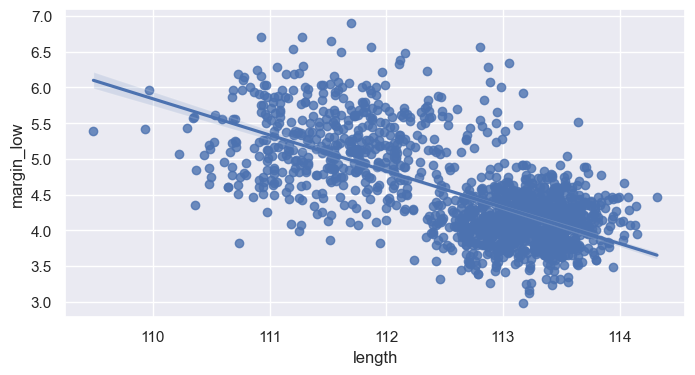

In [26]:
# length v margin_low

plt.figure(figsize = (8, 4)) 
sns.regplot(x="length", y="margin_low", data=df)
plt.show()

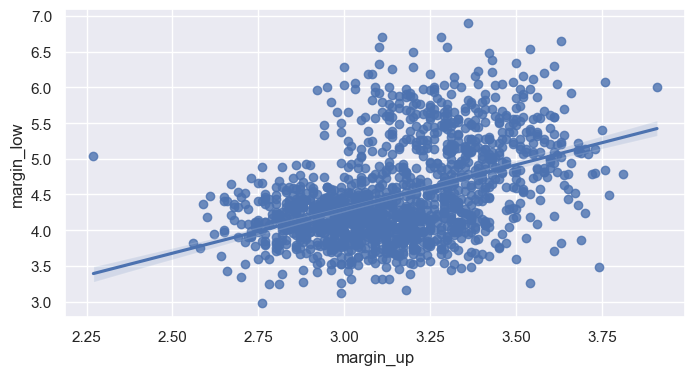

In [27]:
# margin_up v margin_low

plt.figure(figsize = (8, 4)) 
sns.regplot(x="margin_up", y="margin_low", data=df)
plt.show()

In [28]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine

df["is_genuine"].replace([True, False], [1,0], inplace=True)

### Méthode (1) : Stepwise (Backward Elimination) & StatsModel

In [30]:
df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [31]:
# Créer une copie du DF qu'on va utiliser désormais

df_copy = df.copy()

### Partitionner le DF en deux :  Un DF sans les valeurs manquantes et un autre DF qui a les valeurs manquantes

In [33]:
# test_DF pour les valeurs manquantes

test_data = df_copy.loc[df_copy["margin_low"].isna()]
test_data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1    171.94       103.89        103.45         NaN       3.25   
99            1    171.93       104.07        104.18         NaN       3.14   
151           1    172.07       103.80        104.38         NaN       3.02   
197           1    171.45       103.66        103.80         NaN       3.62   
241           1    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [34]:
# Le DF sans les valeurs manquantes

df_sans_valmanq = df_copy.dropna()

In [35]:
df_sans_valmanq

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

In [36]:
# Importation de la librairie StatsModel 

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

### Backward elimination (Elimination inverse)

La technique d'élimination inverse est utilisée en apprentissage automatique pour identifier le meilleur sous-ensemble de caractéristiques parmi un ensemble donné. Elle consiste à supprimer de manière itérative les caractéristiques qui ne sont pas prédictives de la variable cible ou qui ont le moins de pouvoir prédictif.


In [39]:
def selected_backward(data, response):
    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.ols(formula, data).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())
    
    return model

In [40]:
columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']

result_backward = selected_backward(df_sans_valmanq[columns], 'margin_low')

_______________________________
margin_low ~ length + is_genuine + height_left + diagonal + margin_up + height_right + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ is_genuine + height_left + diagonal + margin_up + height_right + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ is_genuine + height_left + margin_up + height_right + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ is_genuine + height_left + margin_up + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

In [41]:
# On a determiné que les features "is_genuine" & "margin_up" sont à retenir !

### Prédire à l'aide du modèle de régression dans Statsmodels

In [43]:
# Définir la variable cible

y = df_sans_valmanq["margin_low"].values.reshape(len(df_sans_valmanq),1)

In [44]:
# Définir les variables prédictives en enlevant les variables qui n'ont pas été retenue avec Backward Elimination
X = df_sans_valmanq.drop(['margin_low','diagonal','height_left','height_right','length'], axis=1)

# Ajouter une constante aux variables prédictives
X = sm.add_constant(X, has_constant='add')

X

const  is_genuine  margin_up
0       1.0           1       2.89
1       1.0           1       2.99
2       1.0           1       2.94
3       1.0           1       3.01
4       1.0           1       3.48
...     ...         ...        ...
1495    1.0           0       3.09
1496    1.0           0       3.37
1497    1.0           0       3.36
1498    1.0           0       3.46
1499    1.0           0       3.37

[1463 rows x 3 columns]

In [45]:
# On partitionne notre jeu de donnée avec train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# Entraîner le model OLS

ols_model = sm.OLS(y_train, X_train).fit()

Le rapport de synthèse OLS est une sortie détaillée qui fournit diverses mesures et statistiques pour aider à évaluer les performances du modèle et à interpréter ses résultats.

In [48]:
y_pred = ols_model.predict(X_train)

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          2.89e-244
Time:                        11:11:50   Log-Likelihood:                -606.17
No. Observations:                1170   AIC:                             1218.
Df Residuals:                    1167   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6622      0.220     25.769      0.0

R² (R-carré) : Le R² mesure la proportion de la variance de la variable dépendante expliquée par les variables indépendantes. Il est compris entre 0 et 1, où 1 indique que le modèle explique toute la variance.

R² ajusté : Le R² ajusté est une version modifiée du R² qui tient compte du nombre de variables indépendantes du modèle, fournissant ainsi une mesure plus précise du pouvoir explicatif du modèle lors de la comparaison de modèles comportant différents nombres de variables.

Statistique F et Prob(Statistique F) : La statistique F permet de tester la significativité globale du modèle. L'hypothèse nulle est que tous les coefficients (à l'exception de l'intercept) sont nuls, ce qui signifie que le modèle n'explique aucune variance de la variable dépendante. La valeur de p associée à la statistique F indique la probabilité d'observer la statistique F (ou une valeur plus extrême) si l'hypothèse nulle était vraie. Une faible valeur de p (généralement inférieure à 0,05) indique que le modèle est statistiquement significatif, ce qui signifie qu'au moins une des variables indépendantes a un effet significatif sur la variable dépendante.

# Les hypothèses de validité à vérifier :

### 1. Colinéarite des variables

 Colinéarite des variables : se produit parce que les variables indépendantes que nous utilisons pour construire un modèle de régression sont corrélées les unes aux autres.

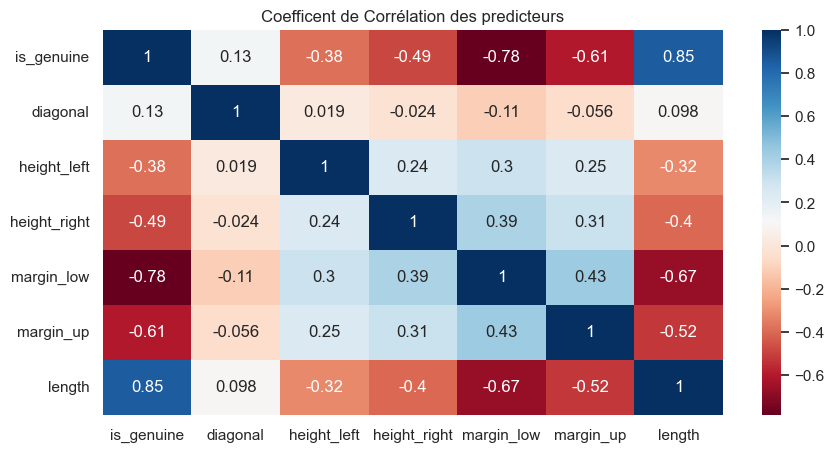

In [55]:
plt.figure(figsize = (10, 5)) 
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("Coefficent de Corrélation des predicteurs")
plt.show()

On note que la variable "length" a une très forte corrélation avec la variable "is_genuine" avec 0.85

2ème méthode avec la VIF

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate VIF
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
   
    X=X.dropna()
#     print(X.isna().sum())
    v=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     print(v)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [60]:
# features to consider removing
considered_features = ['diagonal', 'height_left', 'height_right', 'is_genuine', 'length', 'margin_low', 'margin_up']

# compute vif 
compute_vif(considered_features)

Variable       VIF
0      diagonal  1.028293
1   height_left  1.174137
2  height_right  1.321281
3    is_genuine  6.446913
4        length  3.613323
5    margin_low  2.610122
6     margin_up  1.610467

In [61]:
# VIF égal à 1 = variables non corrélées
# VIF compris entre 1 et 5 = variables modérément corrélées
# VIF supérieur à 5 = variables fortement corrélées

In [62]:
# compute vif values after removing a feature
considered_features.remove('length')
compute_vif(considered_features)

Variable       VIF
0      diagonal  1.027488
1   height_left  1.174070
2  height_right  1.320601
3    is_genuine  3.802262
4    margin_low  2.610072
5     margin_up  1.610424

**On peut en déduire qu'il y a bien une multicolinéarité significative**

In [64]:
# Calcul des résidus
residuals = ols_model.resid

### 2. Homoscédasticité

L'homoscédasticité constitue une hypothèse clé des modèles de régression linéaire, particulièrement adaptée à la méthode 
des moindres carrés lorsque la variance des erreurs autour de la droite de régression reste constante. En cas de variation 
substantielle de la variance des erreurs, la définition du modèle de régression peut s'avérer complexe.

In [67]:
import numpy as np
from scipy.stats import levene

# Récupération des résidus
residuals = ols_model.resid

# la valeur prédite
predicted = ols_model.fittedvalues

# Division des résidus en groupes en fonction de la variable prédite
groups = pd.qcut(predicted, q=5, labels=False)

# le test de Levene sur les résidus groupés
levene_test = levene(*[residuals[groups == i] for i in np.unique(groups)], center='mean')

#  la statistique de test et la valeur p
test_statistic = levene_test.statistic
p_value = levene_test.pvalue

# On affiche les résultats
print("Test de Levene:")
print("Statistique de test:", test_statistic)
print("Valeur p:", p_value)

Test de Levene:
Statistique de test: 29.983642592506712
Valeur p: 9.014373222445792e-24


**La statistique de test de 29.98 et une valeur p de 9.01e-24 (moins de 0.05), l’assumption n’est pas validée**

### 3. Normalité des résidus

Normalité des résidus : L'hypothèse ici est que les résidus (la différence entre les valeurs observées de y et les valeurs prédites de y) sont normalement distribués.

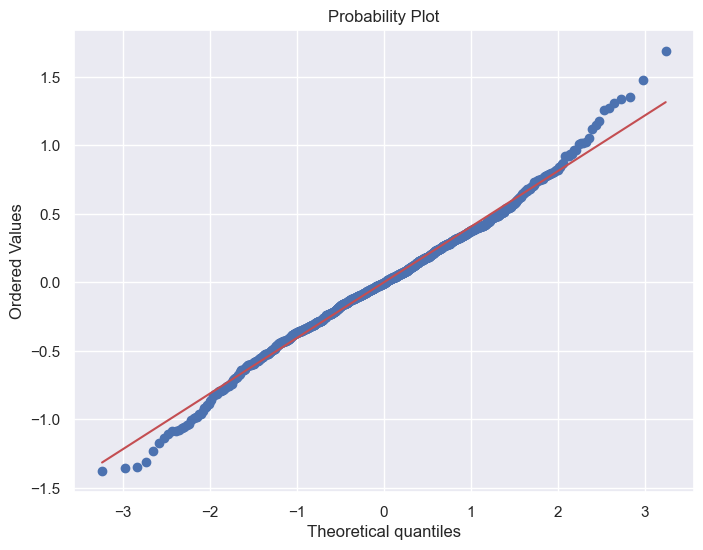

In [71]:
import scipy as sp
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

In [72]:
np.mean(residuals)

1.5945459577607804e-15

In [73]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
    print("P-value :",p_value)


Les résidus ne suivent pas une distribution normale (hypothèse rejetée).
P-value : 7.616344280519634e-06


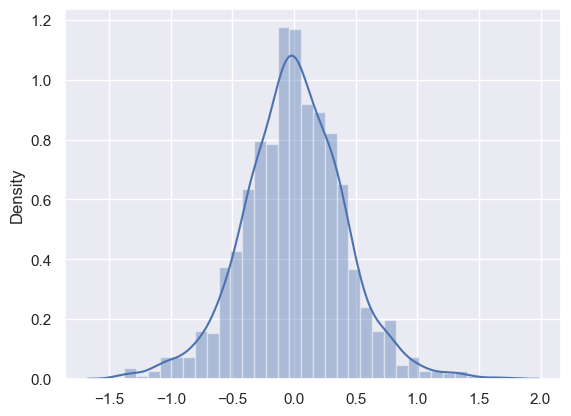

In [74]:
sns.distplot(residuals)
plt.show()

**Le distplot montre une distribution normale mais le test Shapiro ne valide pas cette assomption**

### Application des valeurs manquantes prédites au DF 

In [77]:
# On définit nos valeurs X et y

X = test_data.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
X = sm.add_constant(X)

In [78]:
y = test_data["margin_low"].values.reshape(len(test_data),1)

In [79]:
# On fait la prédiction avec le model StatModel d'en haut

pred = ols_model.predict(X)

In [80]:
pred

72      4.090322
99      4.105030
151     4.121075
197     4.040850
241     4.121075
251     4.130435
284     4.092996
334     4.123749
410     4.107704
413     4.102356
445     4.122412
481     4.162525
505     4.126424
611     4.083637
654     4.163862
675     4.182582
710     4.114390
739     4.111716
742     4.091659
780     4.106367
798     4.122412
844     4.125087
845     4.137120
871     4.114390
895     4.126424
919     4.179908
945     4.121075
946     4.087648
981     4.125087
1076    5.232994
1121    5.238343
1176    5.258399
1303    5.270433
1315    5.207590
1347    5.179511
1435    5.186196
1438    5.228983
dtype: float64

In [81]:
# Assignment des valeurs prédites au DF qui a les valeurs vides (test_data)

new_test_df = test_data.assign(margin_low=pred)
new_test_df 

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72             1    171.94       103.89        103.45    4.090322       3.25   
99             1    171.93       104.07        104.18    4.105030       3.14   
151            1    172.07       103.80        104.38    4.121075       3.02   
197            1    171.45       103.66        103.80    4.040850       3.62   
241            1    171.83       104.14        104.06    4.121075       3.02   
251            1    171.80       103.26        102.82    4.130435       2.95   
284            1    171.92       103.83        103.76    4.092996       3.23   
334            1    171.85       103.70        103.96    4.123749       3.00   
410            1    172.56       103.72        103.51    4.107704       3.12   
413            1    172.30       103.66        103.50    4.102356       3.16   
445            1    172.34       104.42        103.22    4.122412       3.01   
481            1    171.81       103.53        103.96    4.162525       2.71   
505            1    172.01       103.97        104.05    4.126424       2.98   
611            1    171.80       103.68        103.49    4.083637       3.30   
654            1    171.97       103.69        103.54    4.163862       2.70   
675            1    171.60       103.85        103.91    4.182582       2.56   
710            1    172.03       103.97        103.86    4.114390       3.07   
739            1    172.07       103.74        103.76    4.111716       3.09   
742            1    172.14       104.06        103.96    4.091659       3.24   
780            1    172.41       103.95        103.79    4.106367       3.13   
798            1    171.96       103.84        103.62    4.122412       3.01   
844            1    171.62       104.14        104.49    4.125087       2.99   
845            1    172.02       104.21        104.05    4.137120       2.90   
871            1    171.37       104.07        103.75    4.114390       3.07   
895            1    171.81       103.68        103.80    4.126424       2.98   
919            1    171.92       103.68        103.45    4.179908       2.58   
945            1    172.09       103.74        103.52    4.121075       3.02   
946            1    171.63       103.87        104.66    4.087648       3.27   
981            1    172.02       104.23        103.72    4.125087       2.99   
1076           0    171.57       104.27        104.44    5.232994       3.21   
1121           0    171.40       104.38        104.19    5.238343       3.17   
1176           0    171.59       104.05        103.94    5.258399       3.02   
1303           0    172.17       104.49        103.76    5.270433       2.93   
1315           0    172.08       104.15        104.17    5.207590       3.40   
1347           0    171.72       104.46        104.12    5.179511       3.61   
1435           0    172.66       104.33        104.41    5.186196       3.56   
1438           0    171.90       104.28        104.29    5.228983       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [82]:
# Concatenation du test_df avec les valeurs prédites avec le DF sans valeurs manquantes

final_df = pd.concat([df_sans_valmanq, new_test_df], ignore_index=True, sort=True)

In [83]:
final_df

diagonal  height_left  height_right  is_genuine  length  margin_low  \
0       171.81       104.86        104.95           1  112.83    4.520000   
1       171.46       103.36        103.66           1  113.09    3.770000   
2       172.69       104.48        103.50           1  113.16    4.400000   
3       171.36       103.91        103.94           1  113.51    3.620000   
4       171.73       104.28        103.46           1  112.54    4.040000   
...        ...          ...           ...         ...     ...         ...   
1495    172.17       104.49        103.76           0  111.21    5.270433   
1496    172.08       104.15        104.17           0  112.29    5.207590   
1497    171.72       104.46        104.12           0  110.31    5.179511   
1498    172.66       104.33        104.41           0  111.47    5.186196   
1499    171.90       104.28        104.29           0  111.49    5.228983   

      margin_up  
0          2.89  
1          2.99  
2          2.94  
3          3.01  
4          3.48  
...         ...  
1495       2.93  
1496       3.40  
1497       3.61  
1498       3.56  
1499       3.24  

[1500 rows x 7 columns]

In [84]:
final_df.isnull().sum()

diagonal        0
height_left     0
height_right    0
is_genuine      0
length          0
margin_low      0
margin_up       0
dtype: int64

In [85]:
final_df.describe()

diagonal  height_left  height_right   is_genuine      length  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.00000   
mean    171.958440   104.029533    103.920307     0.666667   112.67850   
std       0.305195     0.299462      0.325627     0.471562     0.87273   
min     171.040000   103.140000    102.820000     0.000000   109.49000   
25%     171.750000   103.820000    103.710000     0.000000   112.03000   
50%     171.960000   104.040000    103.920000     1.000000   112.96000   
75%     172.170000   104.230000    104.150000     1.000000   113.34000   
max     173.010000   104.880000    104.950000     1.000000   114.44000   

        margin_low    margin_up  
count  1500.000000  1500.000000  
mean      4.482809     3.151473  
std       0.659780     0.231813  
min       2.980000     2.270000  
25%       4.030000     2.990000  
50%       4.310000     3.140000  
75%       4.870000     3.310000  
max       6.900000     3.910000

**Pour vérifier la cohérence du résultat, on voit bien qu'il n'a pluse de valeurs nulles et que le nombre de lignes est bien 1500 contrairement à 1463 avant l'appel du modèle**

### Méthode (2): Manuelle

In [88]:
# Créer une copie du DF

copy_df = df.copy()

**Étape 1** : *Séparer les valeurs nulles du DataFrame et les considérer comme test_df*

**Étape 2** : *Retirer les valeurs nulles du DataFrame et les considérer comme train_data*

**Étape 3** : *Créer X_train et y_train à partir du train_data*

**Étape 4** : *Construire le modèle de Régression Linéaire*

**Étape 5** : *Créer le X_train à partir test_df*

**Étape 6** : *Appliquer le modèle sur X_test du test_df et formuler des prédictions*

**Étape 7** : *Remplacer les valeurs manquantes par des valeurs prédites*

**1. Mettre les valeurs nulles dans un nouveau DF qui va être le test_data**

In [91]:
test_df = copy_df.loc[df["margin_low"].isna()]

In [92]:
test_df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1    171.94       103.89        103.45         NaN       3.25   
99            1    171.93       104.07        104.18         NaN       3.14   
151           1    172.07       103.80        104.38         NaN       3.02   
197           1    171.45       103.66        103.80         NaN       3.62   
241           1    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [93]:
test_df.shape

(37, 7)

**2. On retire les valeur manquantes du DF et on le considère celui_ci comme le train_data**

In [95]:
copy_df.dropna(inplace=True)

In [96]:
copy_df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

In [97]:
# Re-vérifier qu'il n'y pas de valeurs manquantes dans la train_data

copy_df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

**3. Création de X_train et y_train du DF**

In [99]:
X_train = copy_df.drop("margin_low", axis=1)

In [100]:
X_train

is_genuine  diagonal  height_left  height_right  margin_up  length
0              1    171.81       104.86        104.95       2.89  112.83
1              1    171.46       103.36        103.66       2.99  113.09
2              1    172.69       104.48        103.50       2.94  113.16
3              1    171.36       103.91        103.94       3.01  113.51
4              1    171.73       104.28        103.46       3.48  112.54
...          ...       ...          ...           ...        ...     ...
1495           0    171.75       104.38        104.17       3.09  111.28
1496           0    172.19       104.63        104.44       3.37  110.97
1497           0    171.80       104.01        104.12       3.36  111.95
1498           0    172.06       104.28        104.06       3.46  112.25
1499           0    171.47       104.15        103.82       3.37  112.07

[1463 rows x 6 columns]

In [101]:
X_train.shape

(1463, 6)

In [102]:
# Création de y_train du DF

y_train = copy_df["margin_low"]

In [103]:
y_train

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1463, dtype: float64

In [104]:
y_train.shape

(1463,)

**4. Construire le modèle de Régression Linéaire**

In [106]:
# Appel du modèle

lr = LinearRegression()

In [107]:
# On entraîne le model de la régression linéaire

lr.fit(X_train, y_train)

LinearRegression()

In [108]:
test_df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1    171.94       103.89        103.45         NaN       3.25   
99            1    171.93       104.07        104.18         NaN       3.14   
151           1    172.07       103.80        104.38         NaN       3.02   
197           1    171.45       103.66        103.80         NaN       3.62   
241           1    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [109]:
test_df.shape

(37, 7)

**5. Créer le X_test à partir test_df**

In [111]:
X_test = test_df.drop("margin_low", axis=1)

In [112]:
X_test.head()

is_genuine  diagonal  height_left  height_right  margin_up  length
72            1    171.94       103.89        103.45       3.25  112.79
99            1    171.93       104.07        104.18       3.14  113.08
151           1    172.07       103.80        104.38       3.02  112.93
197           1    171.45       103.66        103.80       3.62  113.27
241           1    171.83       104.14        104.06       3.02  112.36

In [113]:
X_test.shape

(37, 6)

In [114]:
y_test = test_df["margin_low"]

In [115]:
y_test

72     NaN
99     NaN
151    NaN
197    NaN
241    NaN
251    NaN
284    NaN
334    NaN
410    NaN
413    NaN
445    NaN
481    NaN
505    NaN
611    NaN
654    NaN
675    NaN
710    NaN
739    NaN
742    NaN
780    NaN
798    NaN
844    NaN
845    NaN
871    NaN
895    NaN
919    NaN
945    NaN
946    NaN
981    NaN
1076   NaN
1121   NaN
1176   NaN
1303   NaN
1315   NaN
1347   NaN
1435   NaN
1438   NaN
Name: margin_low, dtype: float64

In [116]:
y_test.shape

(37,)

**6. Appliquer le modèle sur X_test et formuler des prédictions**

In [118]:
y_pred = lr.predict(X_test)

In [119]:
y_pred

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [120]:
y_pred.shape

(37,)

**7. Remplacer les valeurs manquantes par les valeurs prédites**

In [122]:
test_df.loc[test_df.margin_low.isna(), "margin_low"] = y_pred

In [123]:
test_df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72             1    171.94       103.89        103.45    4.064954       3.25   
99             1    171.93       104.07        104.18    4.111990       3.14   
151            1    172.07       103.80        104.38    4.134003       3.02   
197            1    171.45       103.66        103.80    3.993571       3.62   
241            1    171.83       104.14        104.06    4.140399       3.02   
251            1    171.80       103.26        102.82    4.094284       2.95   
284            1    171.92       103.83        103.76    4.074124       3.23   
334            1    171.85       103.70        103.96    4.125390       3.00   
410            1    172.56       103.72        103.51    4.080728       3.12   
413            1    172.30       103.66        103.50    4.073633       3.16   
445            1    172.34       104.42        103.22    4.118973       3.01   
481            1    171.81       103.53        103.96    4.180380       2.71   
505            1    172.01       103.97        104.05    4.136484       2.98   
611            1    171.80       103.68        103.49    4.051068       3.30   
654            1    171.97       103.69        103.54    4.178377       2.70   
675            1    171.60       103.85        103.91    4.225551       2.56   
710            1    172.03       103.97        103.86    4.115868       3.07   
739            1    172.07       103.74        103.76    4.102841       3.09   
742            1    172.14       104.06        103.96    4.081843       3.24   
780            1    172.41       103.95        103.79    4.092762       3.13   
798            1    171.96       103.84        103.62    4.112502       3.01   
844            1    171.62       104.14        104.49    4.157176       2.99   
845            1    172.02       104.21        104.05    4.160288       2.90   
871            1    171.37       104.07        103.75    4.121938       3.07   
895            1    171.81       103.68        103.80    4.123536       2.98   
919            1    171.92       103.68        103.45    4.198423       2.58   
945            1    172.09       103.74        103.52    4.109623       3.02   
946            1    171.63       103.87        104.66    4.096960       3.27   
981            1    172.02       104.23        103.72    4.133841       2.99   
1076           0    171.57       104.27        104.44    5.259685       3.21   
1121           0    171.40       104.38        104.19    5.264817       3.17   
1176           0    171.59       104.05        103.94    5.282519       3.02   
1303           0    172.17       104.49        103.76    5.302069       2.93   
1315           0    172.08       104.15        104.17    5.200358       3.40   
1347           0    171.72       104.46        104.12    5.175468       3.61   
1435           0    172.66       104.33        104.41    5.173450       3.56   
1438           0    171.90       104.28        104.29    5.246751       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [124]:
# Concatenation du test_df avec les valeurs prédites avec le DF original

final_df2 = pd.concat([copy_df, test_df], ignore_index=True, sort=True)

In [125]:
final_df2

diagonal  height_left  height_right  is_genuine  length  margin_low  \
0       171.81       104.86        104.95           1  112.83    4.520000   
1       171.46       103.36        103.66           1  113.09    3.770000   
2       172.69       104.48        103.50           1  113.16    4.400000   
3       171.36       103.91        103.94           1  113.51    3.620000   
4       171.73       104.28        103.46           1  112.54    4.040000   
...        ...          ...           ...         ...     ...         ...   
1495    172.17       104.49        103.76           0  111.21    5.302069   
1496    172.08       104.15        104.17           0  112.29    5.200358   
1497    171.72       104.46        104.12           0  110.31    5.175468   
1498    172.66       104.33        104.41           0  111.47    5.173450   
1499    171.90       104.28        104.29           0  111.49    5.246751   

      margin_up  
0          2.89  
1          2.99  
2          2.94  
3          3.01  
4          3.48  
...         ...  
1495       2.93  
1496       3.40  
1497       3.61  
1498       3.56  
1499       3.24  

[1500 rows x 7 columns]

In [126]:
# On re-vérifie s'il y a toujours des valeurs manquantes

final_df2.isnull().sum()

diagonal        0
height_left     0
height_right    0
is_genuine      0
length          0
margin_low      0
margin_up       0
dtype: int64

In [127]:
final_df2.describe()

diagonal  height_left  height_right   is_genuine      length  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.00000   
mean    171.958440   104.029533    103.920307     0.666667   112.67850   
std       0.305195     0.299462      0.325627     0.471562     0.87273   
min     171.040000   103.140000    102.820000     0.000000   109.49000   
25%     171.750000   103.820000    103.710000     0.000000   112.03000   
50%     171.960000   104.040000    103.920000     1.000000   112.96000   
75%     172.170000   104.230000    104.150000     1.000000   113.34000   
max     173.010000   104.880000    104.950000     1.000000   114.44000   

        margin_low    margin_up  
count  1500.000000  1500.000000  
mean      4.482844     3.151473  
std       0.659899     0.231813  
min       2.980000     2.270000  
25%       4.027500     2.990000  
50%       4.310000     3.140000  
75%       4.870000     3.310000  
max       6.900000     3.910000

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Exploration du DataFrame : billet.csv"</h2>
</div>

### Diffrence entre les vrais et faux billets

In [130]:
# On calcule la différence en diagonale entre les vrais et les faux billets

difference_diagonale = (((final_df.loc[df["is_genuine"]==True, "diagonal"].mean()) - (final_df.loc[df["is_genuine"] == False, "diagonal"].mean())))

In [131]:
# On calcule la différence de hauteur entre les vrais et les faux billets

difference_haut_left  = (((final_df.loc[df["is_genuine"]==True, "height_left"].mean())-(final_df.loc[df["is_genuine"]==False, "height_left"].mean())))
                        


difference_haut_right = (((final_df.loc[df["is_genuine"]==True, "height_right"].mean())-(final_df.loc[df["is_genuine"]==False, "height_right"].mean())))
                        

In [132]:
# On calcule la différence margin entre les vrais et les faux billets

difference_margin_low = (((final_df.loc[df["is_genuine"]==True, "margin_low"].mean())-(final_df.loc[df["is_genuine"]==False, "margin_low"].mean()))) 
                        

difference_margin_up = (((final_df.loc[df["is_genuine"]==True, "margin_up"].mean())-(df.loc[final_df["is_genuine"]==False, "margin_up"].mean())))
                         

In [133]:
# On calcule la différence de longeur entre les vrais et les faux billets

difference_length = (((final_df.loc[df["is_genuine"]==True, "length"].mean())-(final_df.loc[df["is_genuine"]==False, "length"].mean())))
                    

In [134]:
# Mettre les valeurs dans un nouveau DataFrame

pd.DataFrame(index = ["Les différences entre vrais & faux billets"], columns = ["diagonale","height_left","height_right","margin_low","margin_up","length"],
             data=[[difference_diagonale, difference_haut_left, difference_haut_right, difference_margin_low,difference_margin_up, difference_length]])

diagonale  height_left  \
Les différences entre vrais & faux billets    0.08271     -0.21727   

                                            height_right  margin_low  \
Les différences entre vrais & faux billets      -0.30512   -1.006586   

                                            margin_up   length  
Les différences entre vrais & faux billets   -0.26659  1.42647

On peut en déduire que :

Les vrais billets ont une diagonale légèrement plus importante

La hauteur et la marge des faux billets sont lègèrement plus importantes

Les vrais billets sont plus grands en largeur

### Distribution des variables

In [140]:
new_df = final_df.copy()

In [141]:
new_df = new_df.drop("is_genuine", axis=1)

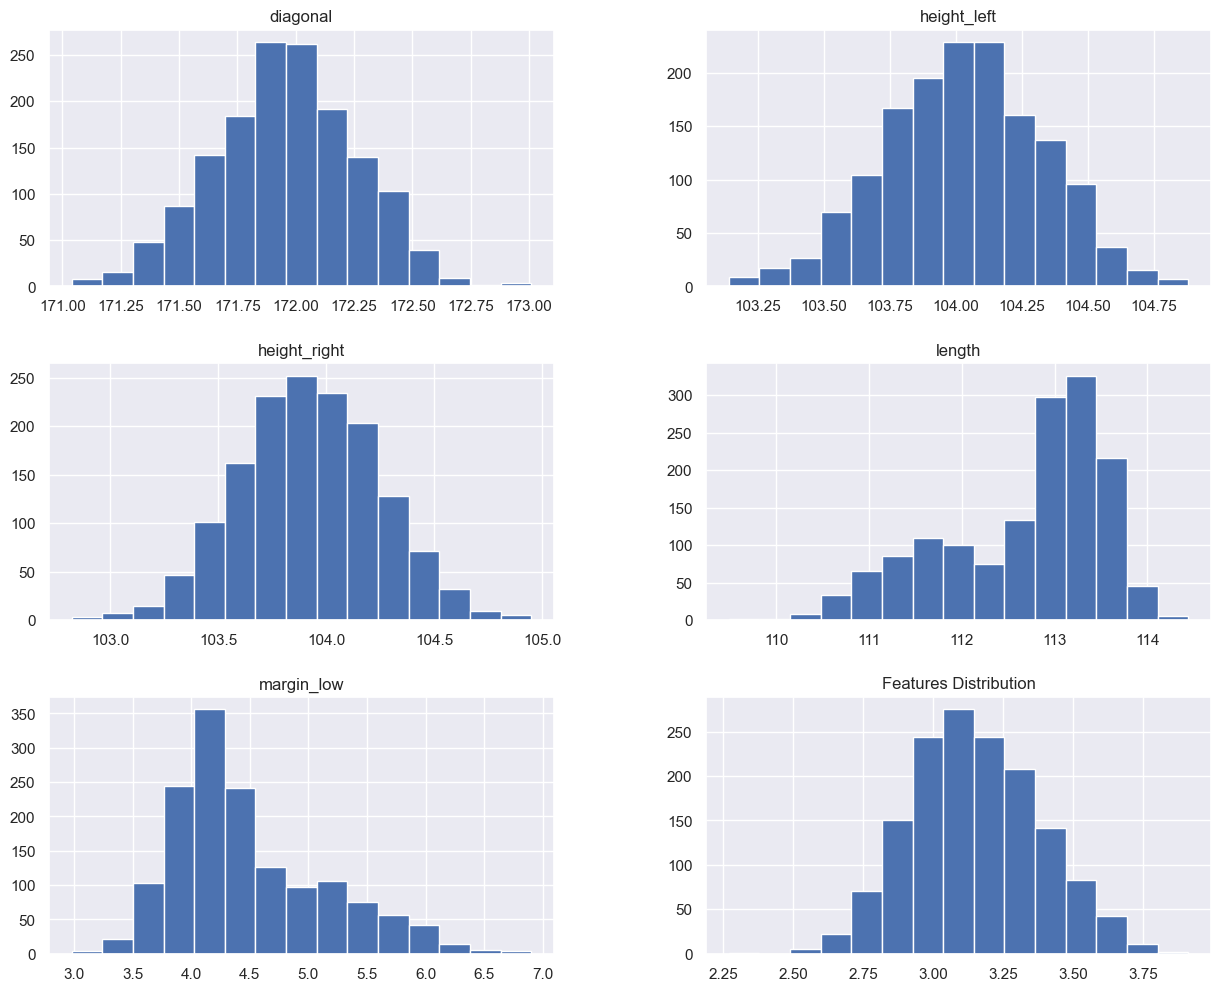

In [142]:
new_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [143]:
new_df2 = final_df.copy()

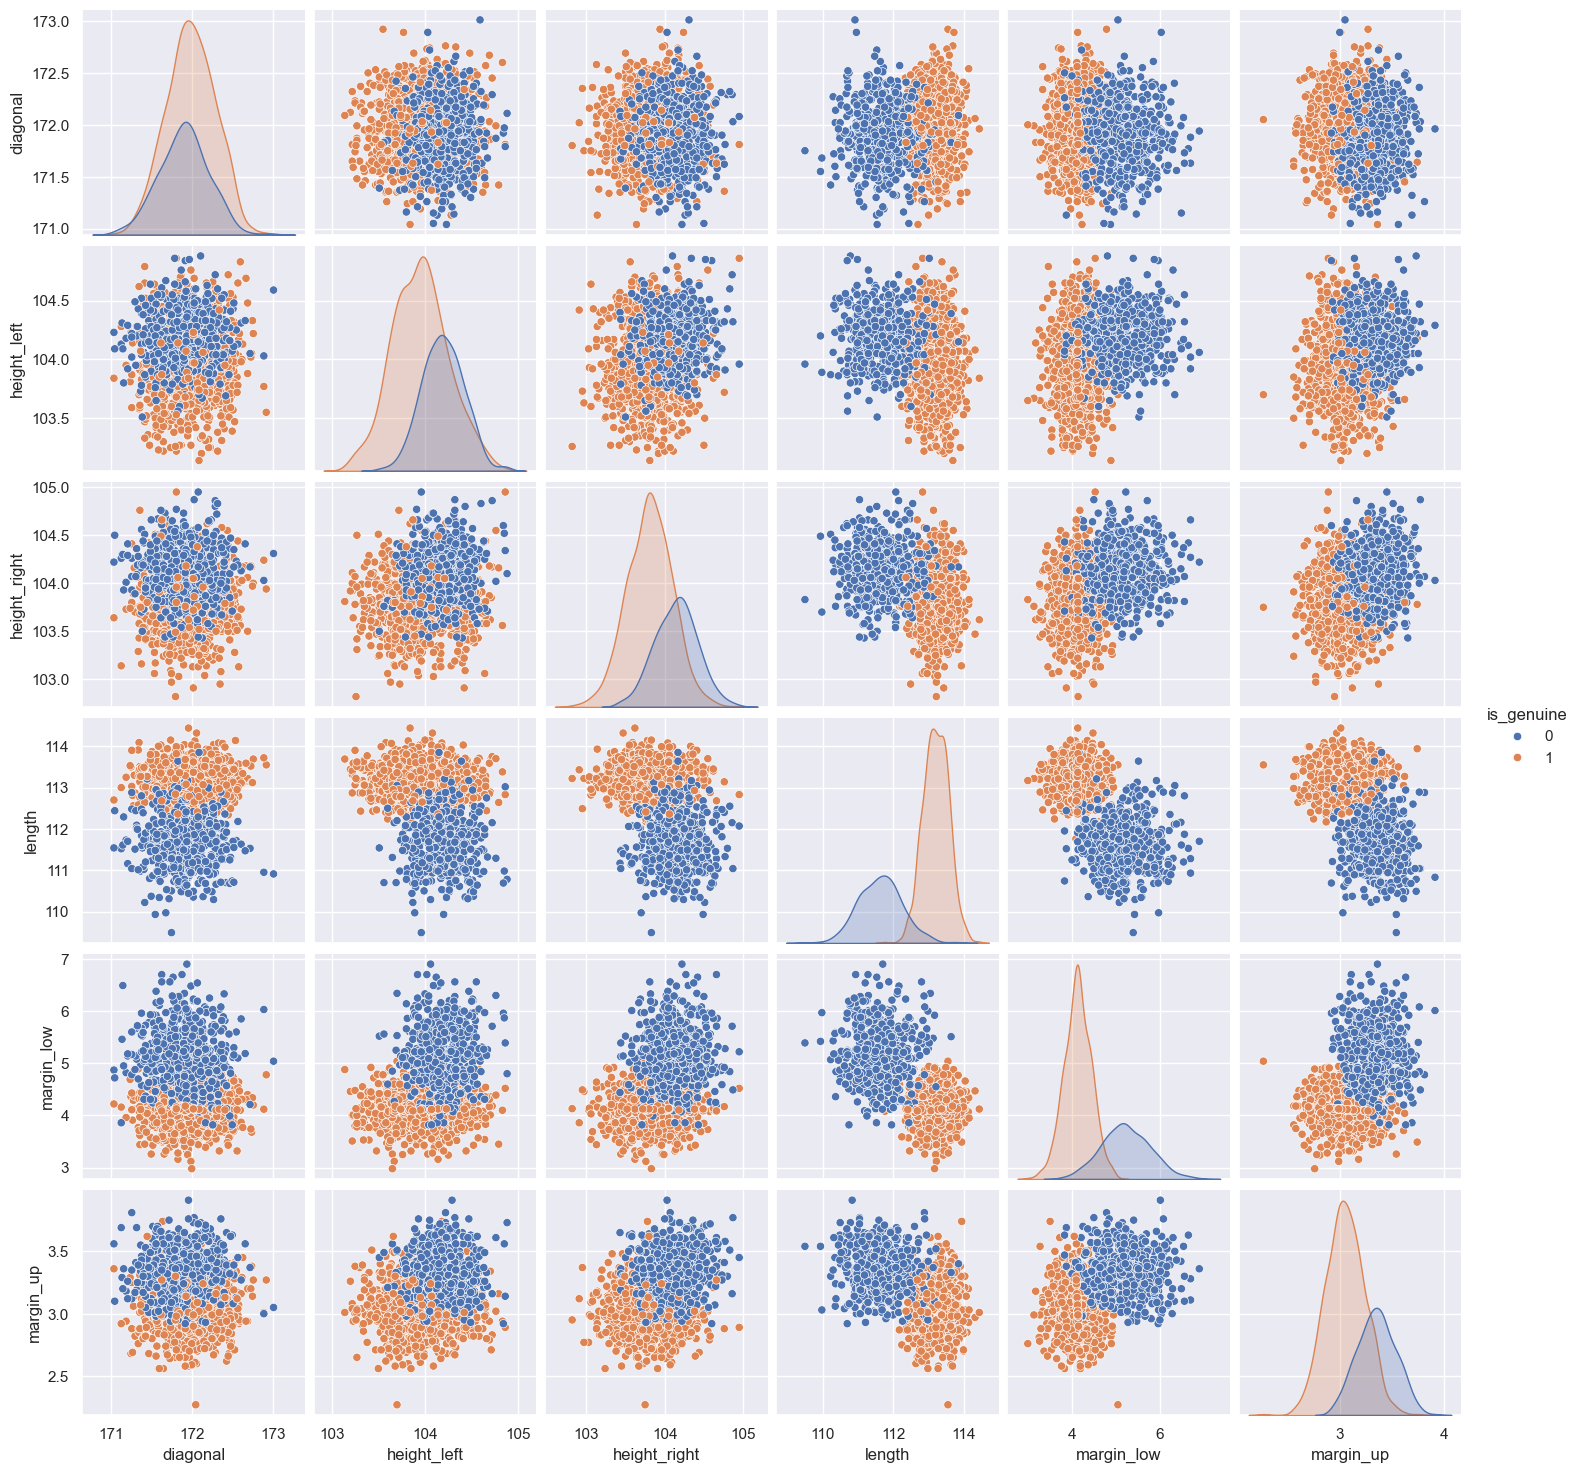

In [144]:
# Visualiser la relation de chaque pair de variables du dataset

sns.pairplot(new_df2, hue="is_genuine")

<Axes: xlabel='length', ylabel='is_genuine'>

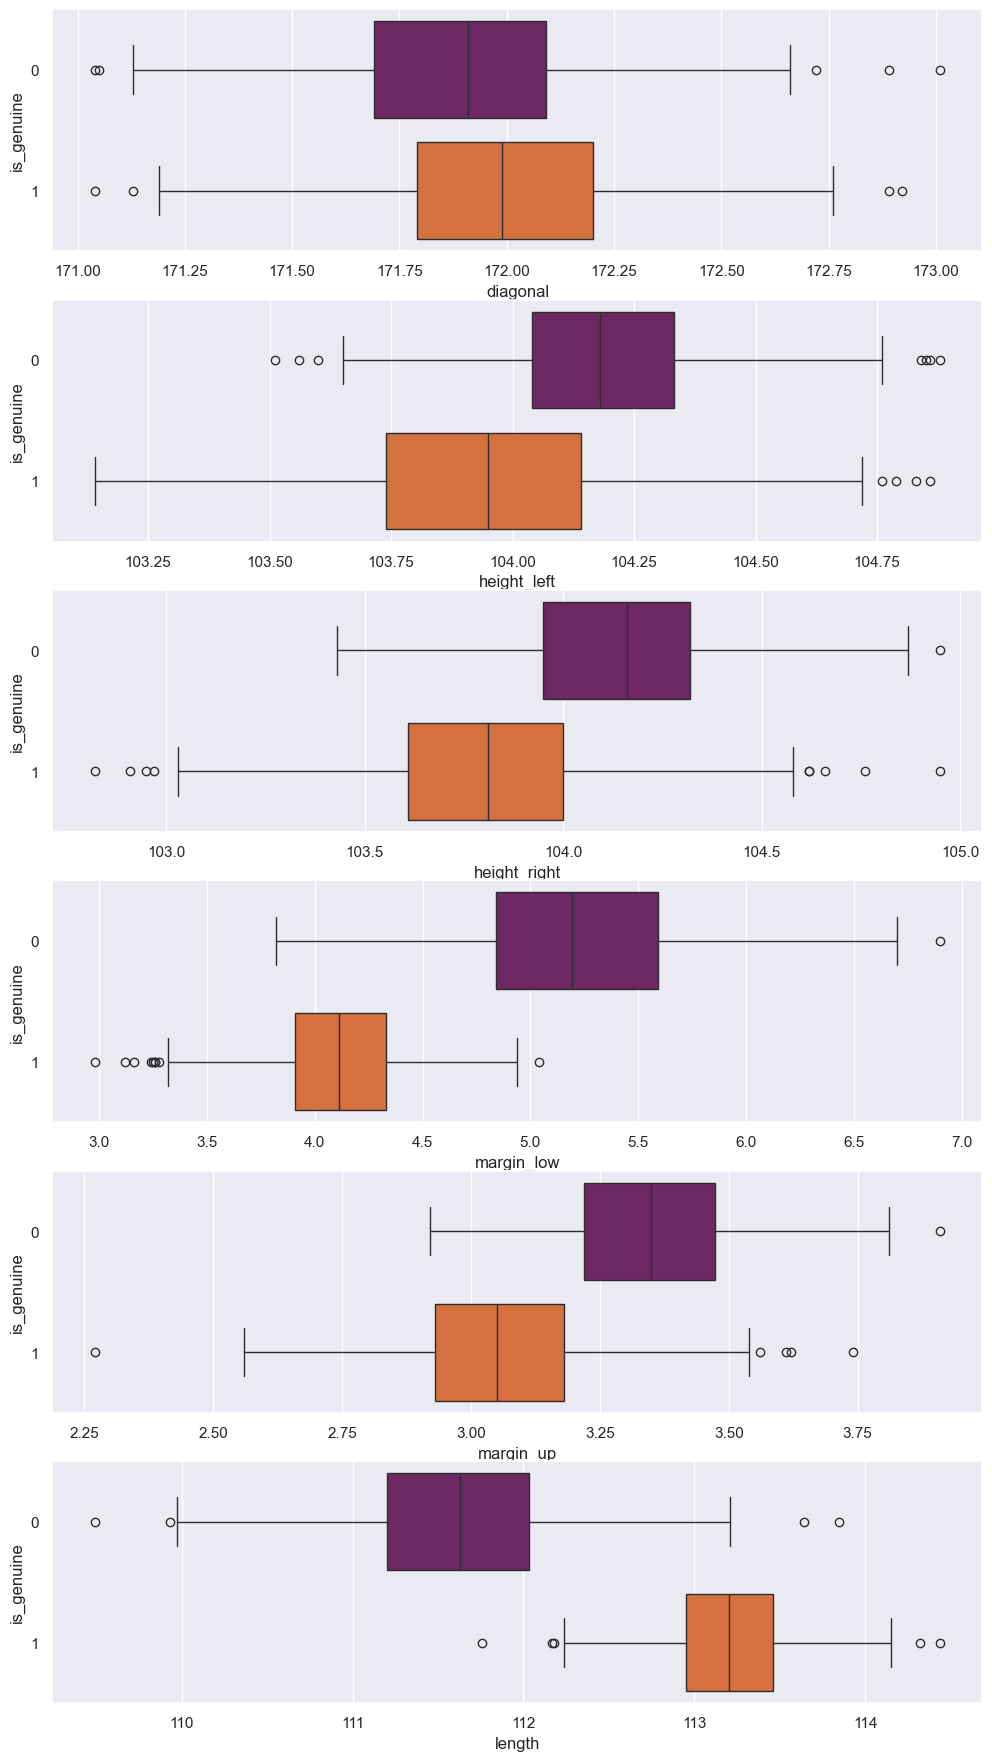

In [145]:
fig, axs = plt.subplots(6,1, figsize=(12,22))
sns.boxplot(new_df2, ax=axs[0], orient="h", x='diagonal',y='is_genuine',palette = "inferno")
sns.boxplot(new_df2, ax=axs[1], orient="h", x='height_left',y='is_genuine',palette = "inferno" )
sns.boxplot(new_df2, ax=axs[2], orient="h", x='height_right',y='is_genuine',palette = "inferno")
sns.boxplot(new_df2, ax=axs[3], orient="h", x='margin_low',y='is_genuine',palette = "inferno")
sns.boxplot(new_df2, ax=axs[4], orient="h", x='margin_up',y='is_genuine',palette = "inferno")
sns.boxplot(new_df2, ax=axs[5], orient="h", x='length',y='is_genuine',palette = "inferno")

### Normalisation

In [147]:
# Normaliser toutes les variables numériques sans la colonne "is_genuine"

scaler = preprocessing.MinMaxScaler()

scale_cols = ["diagonal","height_left","height_right","margin_low","margin_up","length"]
resid_cols = final_df.drop(columns = scale_cols).columns
df_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(final_df[scale_cols]), columns =scale_cols), final_df[resid_cols]], axis=1)

In [148]:
df_scaled

diagonal  height_left  height_right  margin_low  margin_up    length  \
0     0.390863     0.988506      1.000000    0.392857   0.378049  0.674747   
1     0.213198     0.126437      0.394366    0.201531   0.439024  0.727273   
2     0.837563     0.770115      0.319249    0.362245   0.408537  0.741414   
3     0.162437     0.442529      0.525822    0.163265   0.451220  0.812121   
4     0.350254     0.655172      0.300469    0.270408   0.737805  0.616162   
...        ...          ...           ...         ...        ...       ...   
1495  0.573604     0.775862      0.441315    0.584294   0.402439  0.347475   
1496  0.527919     0.580460      0.633803    0.568263   0.689024  0.565657   
1497  0.345178     0.758621      0.610329    0.561100   0.817073  0.165657   
1498  0.822335     0.683908      0.746479    0.562805   0.786585  0.400000   
1499  0.436548     0.655172      0.690141    0.573720   0.591463  0.404040   

      is_genuine  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
1495           0  
1496           0  
1497           0  
1498           0  
1499           0  

[1500 rows x 7 columns]

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4. ACP, Cercle de corrélation, K-Means</h2>
</div>

# ACP

In [151]:
final_df

diagonal  height_left  height_right  is_genuine  length  margin_low  \
0       171.81       104.86        104.95           1  112.83    4.520000   
1       171.46       103.36        103.66           1  113.09    3.770000   
2       172.69       104.48        103.50           1  113.16    4.400000   
3       171.36       103.91        103.94           1  113.51    3.620000   
4       171.73       104.28        103.46           1  112.54    4.040000   
...        ...          ...           ...         ...     ...         ...   
1495    172.17       104.49        103.76           0  111.21    5.270433   
1496    172.08       104.15        104.17           0  112.29    5.207590   
1497    171.72       104.46        104.12           0  110.31    5.179511   
1498    172.66       104.33        104.41           0  111.47    5.186196   
1499    171.90       104.28        104.29           0  111.49    5.228983   

      margin_up  
0          2.89  
1          2.99  
2          2.94  
3          3.01  
4          3.48  
...         ...  
1495       2.93  
1496       3.40  
1497       3.61  
1498       3.56  
1499       3.24  

[1500 rows x 7 columns]

In [152]:
final_df.columns

Index(['diagonal', 'height_left', 'height_right', 'is_genuine', 'length',
       'margin_low', 'margin_up'],
      dtype='object')

In [153]:
X = final_df.drop("is_genuine", axis=1)

In [154]:
y = final_df["is_genuine"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 21)

In [156]:
# Ne standardiser que les variables numériques !!!!

scaler = StandardScaler()

X_train = StandardScaler().fit_transform(X_train)

In [157]:
X_train = X_train

In [158]:
X_train

array([[ 0.93542478,  0.61933809, -0.76877724,  0.52338404, -0.2930215 ,
         0.76311353],
       [-0.25602348, -0.53634877,  0.29425839, -0.21941707, -0.56505204,
         0.76311353],
       [ 0.47208379, -0.1731329 , -0.19170076,  0.37707473, -0.03610377,
        -0.40046491],
       ...,
       [ 1.06780792, -0.1731329 ,  0.1727686 ,  0.45585667,  0.02434746,
        -1.00380188],
       [-1.21580124,  0.05800447,  1.44841136, -1.71627385,  0.84043909,
         1.2802595 ],
       [-1.71223802, -0.23917215, -0.00946608,  0.61342054, -1.23001559,
        -1.13308838]])

In [159]:
y_train = y_train

In [160]:
pca1 = PCA()

In [161]:
X_pca1 = pca1.fit_transform(X_train)

In [162]:
pca1.explained_variance_ratio_

array([0.43716405, 0.16796799, 0.13047502, 0.11740481, 0.095076  ,
       0.05191212])

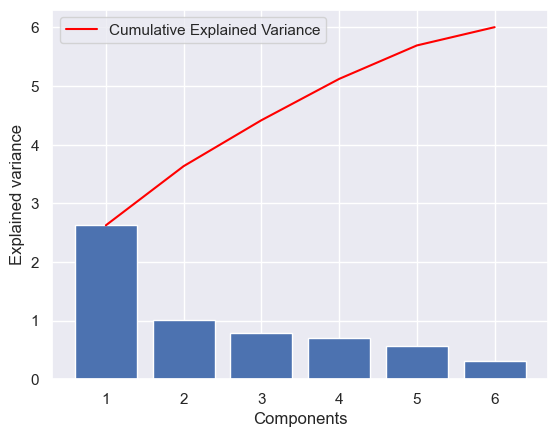

In [163]:
plt.bar(range(1,len(pca1.explained_variance_ )+1),pca1.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_ )+1),
         np.cumsum(pca1.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

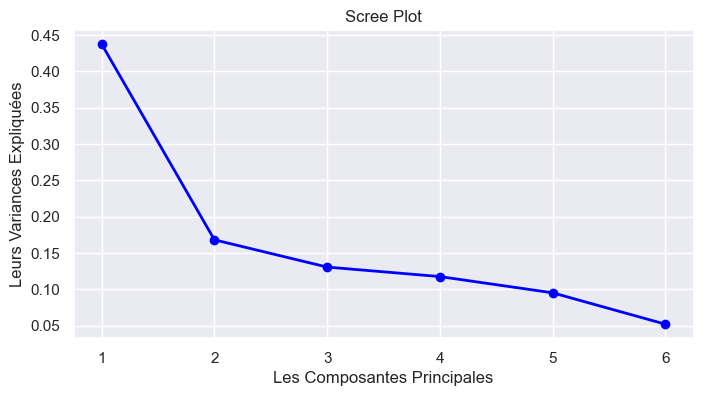

In [164]:
PC_values = np.arange(pca1.n_components_) + 1
plt.figure(figsize = (8, 4)) 
plt.plot(PC_values, pca1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Les Composantes Principales')
plt.ylabel('Leurs Variances Expliquées')
plt.show()

La 1ère composante principale détient 43,71% de la variance totale.

La 2ème composante principale détient 16,79% de la variance totale.

La 3ème composante principale détient 13,04% de la variance totale.

La 4ème composante principale détiente 11,74% de la variance totale.

La 5ème composante principale détient 9,5% de la variance totale.

La 6ème composante principale détient 5,1% de la variance totale.

In [166]:
pca2 = PCA(0.60)

In [167]:
X_pca2 = pca2.fit_transform(X_train)

In [168]:
X_pca2.shape

(1200, 2)

In [169]:
pca2.explained_variance_ratio_

array([0.43716405, 0.16796799])

In [170]:
pca2c = PCA(n_components= 2)

In [171]:
X_pca2c = pca2c.fit_transform(X_train)

In [172]:
X_pca2c

array([[ 0.28432437,  1.0333861 ],
       [-0.13089914, -0.32971152],
       [ 0.57440233,  0.38379233],
       ...,
       [ 0.7692061 ,  0.97793113],
       [-2.60667509, -1.06545812],
       [ 1.3463506 , -1.60958846]])

In [173]:
colormap = plt.cm.get_cmap('coolwarm')

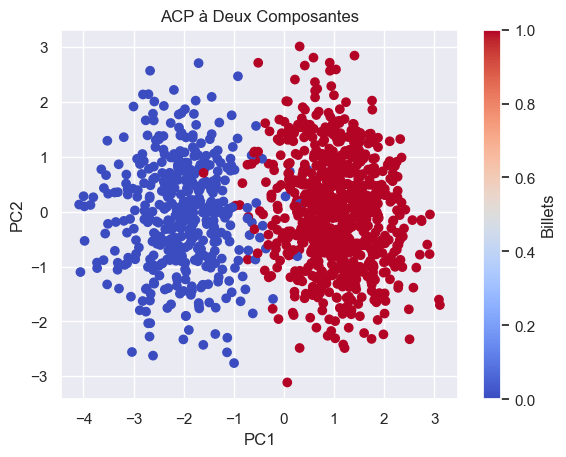

In [174]:
# Traçer un scatterplot de PC1 v PC2

plt.figure()
scatter = plt.scatter(X_pca2c[:,0], X_pca2c[:,1], c= y_train, cmap= colormap)
plt.title("ACP à Deux Composantes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label= "Billets")
plt.show()

### Le cercle de corrélation 

Le cercle de corrélation est une visualisation montrant dans quelle mesure les variables d'origine sont corrélées avec les deux premières composantes principales.

In [177]:
from mlxtend.plotting import plot_pca_correlation_graph

In [178]:
X = final_df.drop("is_genuine", axis=1)
y = final_df["is_genuine"]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 21)

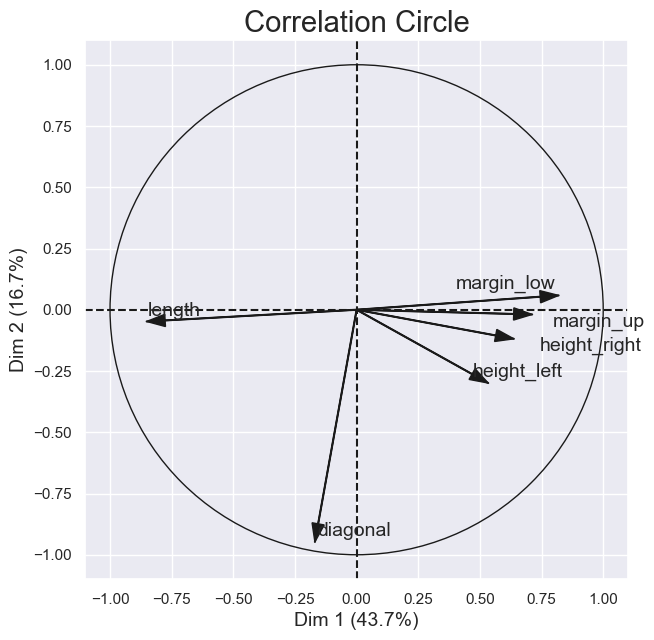

In [180]:
X_norm = X_train / X_train.std(axis=0) # Normalizing the feature columns is recommended

feature_names = ['diagonal', 'height_left', 'height_right', 'length','margin_low', 'margin_up']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=7)

### Classification Ascendante Hierarchique (CAH)

In [182]:
X = final_df.values
billets = final_df.index

In [183]:
X

array([[171.81      , 104.86      , 104.95      , ..., 112.83      ,
          4.52      ,   2.89      ],
       [171.46      , 103.36      , 103.66      , ..., 113.09      ,
          3.77      ,   2.99      ],
       [172.69      , 104.48      , 103.5       , ..., 113.16      ,
          4.4       ,   2.94      ],
       ...,
       [171.72      , 104.46      , 104.12      , ..., 110.31      ,
          5.17951051,   3.61      ],
       [172.66      , 104.33      , 104.41      , ..., 111.47      ,
          5.18619599,   3.56      ],
       [171.9       , 104.28      , 104.29      , ..., 111.49      ,
          5.22898305,   3.24      ]])

In [184]:
billets

RangeIndex(start=0, stop=1500, step=1)

In [185]:
# On standardise d'abord les données

scaler = StandardScaler()

X_scaled = StandardScaler().fit_transform(X)

In [186]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X_scaled, "ward")

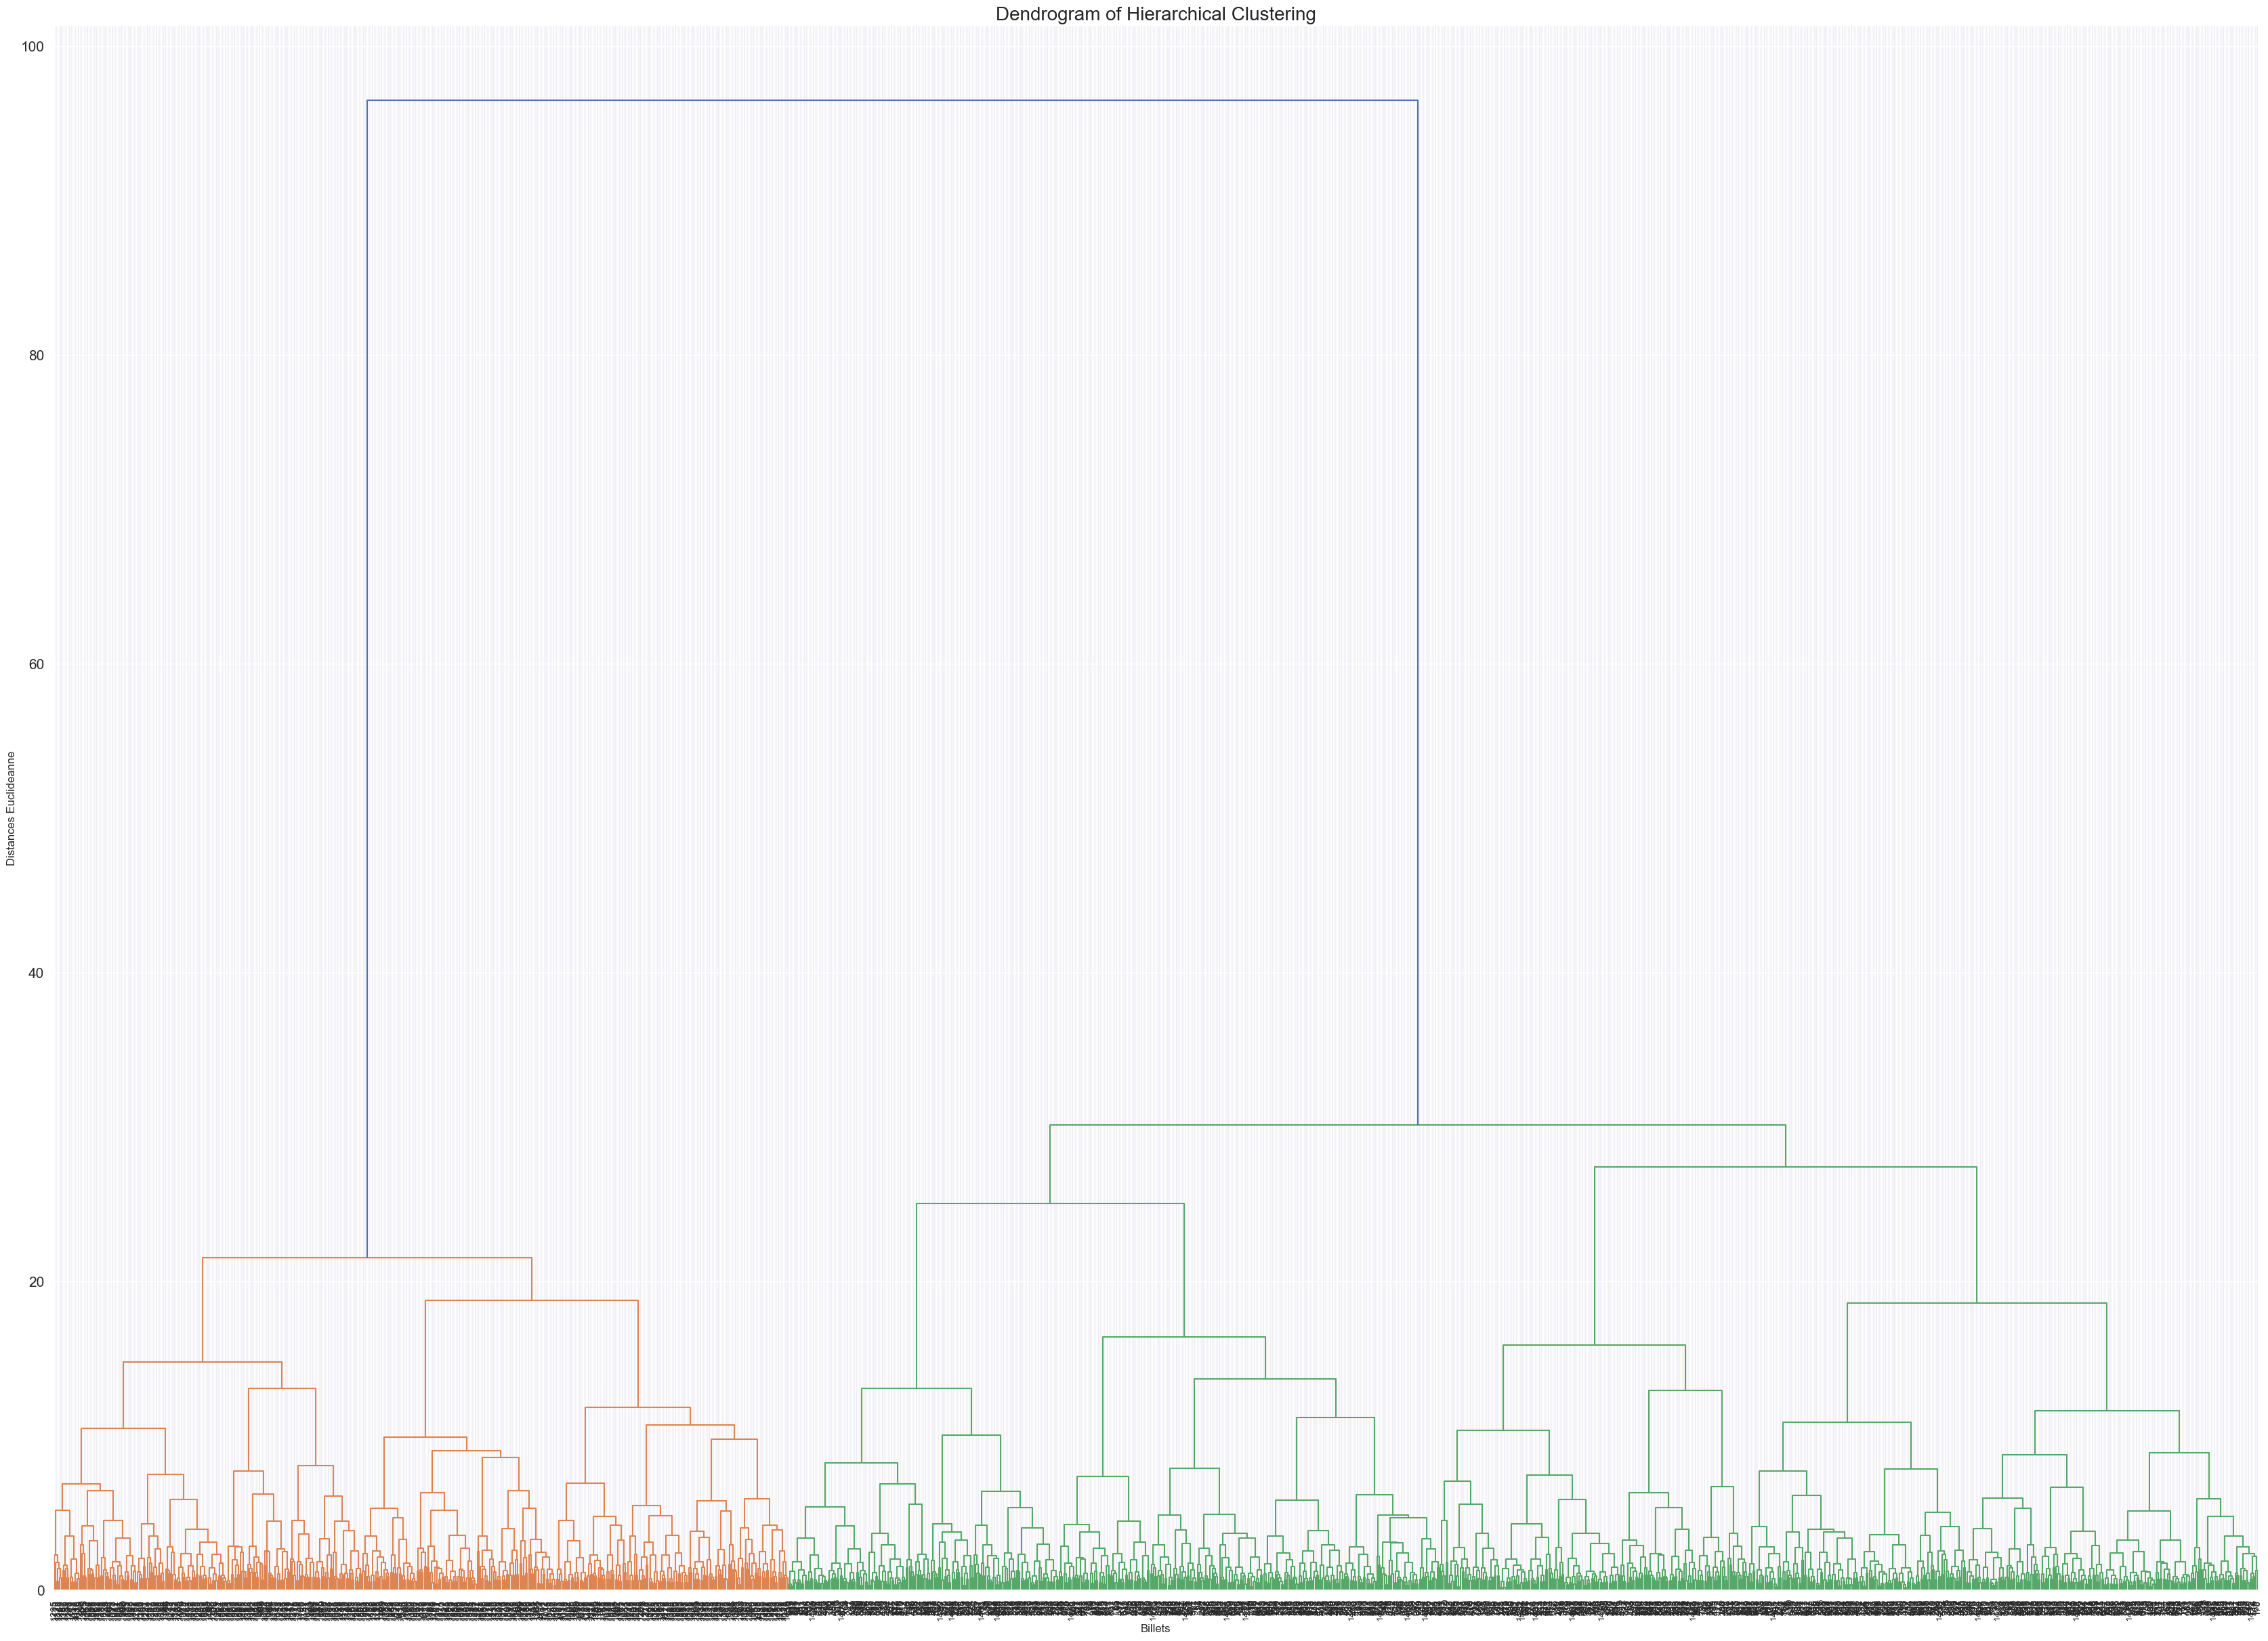

In [187]:
def my_dendrogram(Z, billets):
    fig, ax = plt.subplots(1, 1, figsize=(42,30))

    _ = dendrogram(Z, ax=ax, labels=billets, orientation = "top")

    plt.title("Dendrogram of Hierarchical Clustering", fontsize=20)
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel('Billets')
    plt.ylabel('Distances Euclideanne')
    plt.show()
    
my_dendrogram(Z, billets)

# K-Means

In [189]:
from yellowbrick.cluster import KElbowVisualizer ,silhouette_visualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [190]:
final_df

diagonal  height_left  height_right  is_genuine  length  margin_low  \
0       171.81       104.86        104.95           1  112.83    4.520000   
1       171.46       103.36        103.66           1  113.09    3.770000   
2       172.69       104.48        103.50           1  113.16    4.400000   
3       171.36       103.91        103.94           1  113.51    3.620000   
4       171.73       104.28        103.46           1  112.54    4.040000   
...        ...          ...           ...         ...     ...         ...   
1495    172.17       104.49        103.76           0  111.21    5.270433   
1496    172.08       104.15        104.17           0  112.29    5.207590   
1497    171.72       104.46        104.12           0  110.31    5.179511   
1498    172.66       104.33        104.41           0  111.47    5.186196   
1499    171.90       104.28        104.29           0  111.49    5.228983   

      margin_up  
0          2.89  
1          2.99  
2          2.94  
3          3.01  
4          3.48  
...         ...  
1495       2.93  
1496       3.40  
1497       3.61  
1498       3.56  
1499       3.24  

[1500 rows x 7 columns]

In [191]:
X = final_df.drop("is_genuine", axis=1)

In [192]:
y = final_df["is_genuine"]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 21)

In [194]:
X_train

diagonal  height_left  height_right  length  margin_low  margin_up
300     172.24       104.22        103.67  113.13        4.30       3.33
956     171.88       103.87        104.02  112.47        4.12       3.33
679     172.10       103.98        103.86  113.00        4.47       3.06
1433    171.49       104.42        104.40  111.45        5.08       3.36
430     172.45       103.87        104.40  113.62        3.75       3.05
...        ...          ...           ...     ...         ...        ...
368     171.74       104.53        103.38  112.85        4.39       3.00
48      172.07       104.05        103.82  113.05        3.71       3.61
772     172.28       103.98        103.98  113.07        4.51       2.92
1231    171.59       104.05        104.40  111.14        5.05       3.45
969     171.44       103.96        103.92  113.21        3.68       2.89

[1200 rows x 6 columns]

In [195]:
# Ne standardiser que les variables numériques !!!!

scaler = StandardScaler()

X_train = StandardScaler().fit_transform(X_train)

In [196]:
#Instancier le modèle de clustering

km = KMeans(n_clusters= 2)

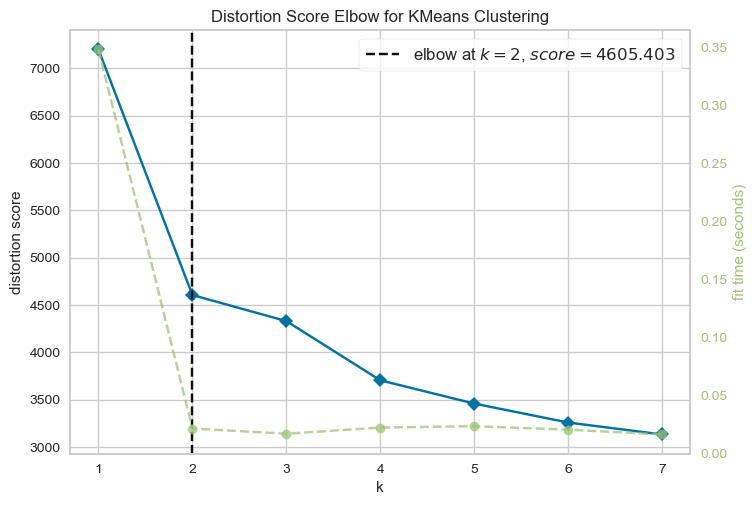

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [197]:
#Instancier  le visualiseur

visualizer = KElbowVisualizer(km, k=(1,8))
 
visualizer.fit(X_train)        # Entraîner les données au visualizer
visualizer.show()        

*Nous avons déterminé que le nombre optimal de k = 2*

### Projection des individus avec les clusters (k= 2)

In [200]:
pca = decomposition.PCA(n_components= 2).fit(X_train)
V_projected = pca.transform(X_train)

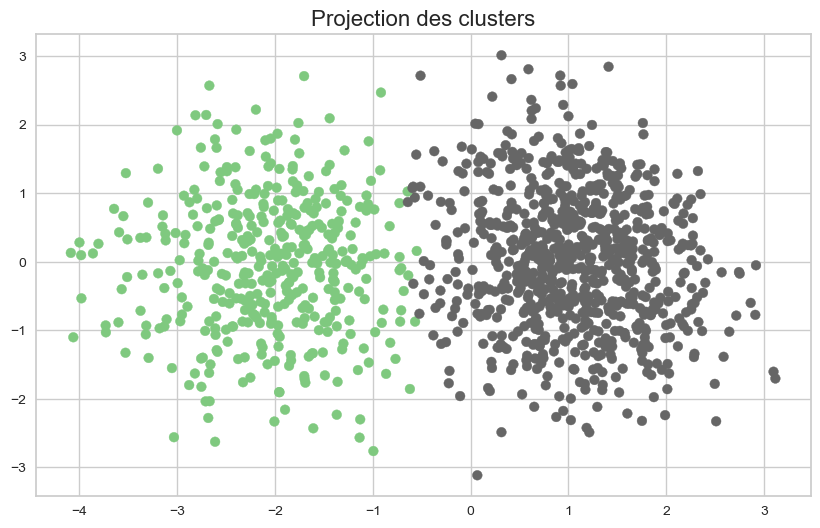

In [201]:
km = KMeans(n_clusters= 2, init='k-means++', max_iter=100, n_init=1, verbose=0, random_state= 21)

km.fit(X_train)
clusters = km.labels_

plt.figure(figsize=(10,6))
plt.scatter(V_projected[:, 0], V_projected[:, 1], c=km.labels_, cmap='Accent')
plt.title('Projection des clusters', fontsize=16)

plt.show()

### Projection des centroides avec les deux clusters

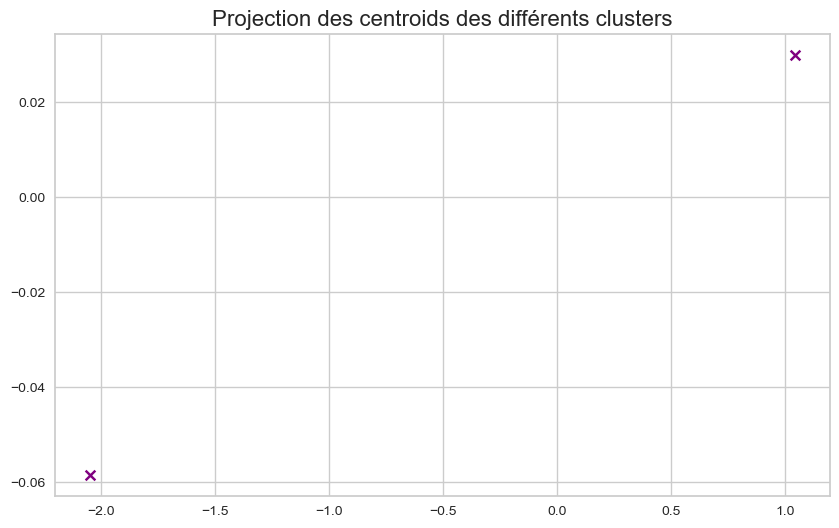

In [203]:
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

# Affichage des centroids
plt.figure(figsize=(10,6))
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Projection des centroids des différents clusters', fontsize=16)
plt.show()

### Traçage des centroids avec le graphique

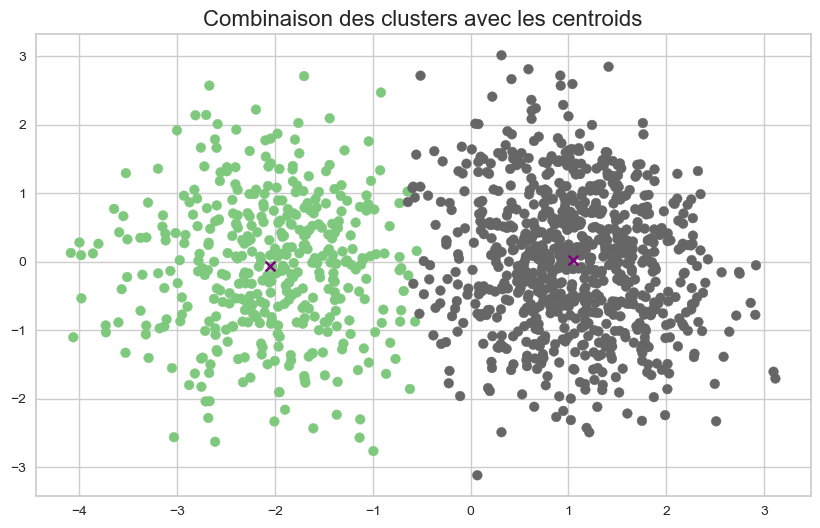

In [205]:
# Combinaison des deux graphiques précédents
# Affichage des centroids
plt.figure(figsize=(10,6))

plt.scatter(V_projected[:, 0], V_projected[:, 1], c=km.labels_, cmap='Accent')
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Combinaison des clusters avec les centroids', fontsize=16)
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5. Prédiction des billets : 4 algorithmes à tester</h2>
</div>

# (1) Régression Logistique

In [208]:
from sklearn.linear_model import LogisticRegression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

### Les 6 Hypothèses de La Régression Logistique

Hypothèse 1 - Type de résultat approprié (doit être catégorique)

Hypothèse 2 - Linéarité des variables indépendantes et log-odds

Hypothèse 3 - Absence de valeurs aberrantes fortement influentes

Hypothèse 4 - Absence de multicolinéarité

Hypothèse 5 - Indépendance des observations

Hypothèse 6 - Taille d'échantillon suffisamment grande

### Assomption 1

In [212]:
# Type de résultat (variable binaire : 2 modalités)

In [213]:
# La régression logistique fonctionne généralement comme un classificateur, de sorte que le type de régression logistique utilisé 
# (binaire, multinomiale ou ordinale) doit correspondre à la variable de résultat (dépendante) dans l'ensemble de données.

In [214]:
print(final_df['is_genuine'].nunique())

2


In [215]:
# Cette hypothèse est validée

### Assomption 2

In [217]:
# L'une des hypothèses essentielles de la régression logistique est que la relation entre le logit (ou log-odds) du résultat et chaque variable 
# indépendante continue est linéaire.

# Le logit est le logarithme du rapport de cotes, où p = probabilité d'un résultat positif
# logit(p) = log(p/1-p)

In [218]:
# Box Tidwell ne fonctionne que pour les valeurs positives. Par conséquent, supprimez les valeurs où x = 0. Pas de valeur nulle

In [219]:
# Logistic Regression with statsmodel 
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test

new_finaldf_lt = final_df.copy()

# Define continuous variables
continuous_var = ['diagonal', 'height_left', 'height_right', 'length', 'margin_low', 'margin_up']

# Add logit transform interaction terms (natural log) for continuous variables e.g. diagonal * Log(Age)
for var in continuous_var:
    new_finaldf_lt[f'{var}:Log_{var}'] = new_finaldf_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

new_finaldf_lt.head()

diagonal  height_left  height_right  is_genuine  length  margin_low  \
0    171.81       104.86        104.95           1  112.83        4.52   
1    171.46       103.36        103.66           1  113.09        3.77   
2    172.69       104.48        103.50           1  113.16        4.40   
3    171.36       103.91        103.94           1  113.51        3.62   
4    171.73       104.28        103.46           1  112.54        4.04   

   margin_up  diagonal:Log_diagonal  height_left:Log_height_left  \
0       2.89             884.201131                   487.874376   
1       2.99             882.050252                   479.406217   
2       2.94             889.612203                   485.727067   
3       3.01             881.435846                   482.508697   
4       3.48             883.709439                   484.597460   

   height_right:Log_height_right  length:Log_length  \
0                     488.383151         533.221296   
1                     481.098117         534.710324   
2                     480.195662         535.111319   
3                     482.678007         537.116940   
4                     479.970087         531.561163   

   margin_low:Log_margin_low  margin_up:Log_margin_up  
0                   6.818474                 3.067031  
1                   5.003073                 3.274867  
2                   6.519060                 3.170524  
3                   4.657036                 3.316840  
4                   5.640829                 4.339672

In [220]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + new_finaldf_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['diagonal',
 'height_left',
 'height_right',
 'length',
 'margin_low',
 'margin_up',
 'diagonal:Log_diagonal',
 'height_left:Log_height_left',
 'height_right:Log_height_right',
 'length:Log_length',
 'margin_low:Log_margin_low',
 'margin_up:Log_margin_up']

In [221]:
# Redefine independent variables to include interaction terms

X_lt = new_finaldf_lt[cols_to_keep]
y_lt = new_finaldf_lt['is_genuine']

# Add constant
X_lt = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1487
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.283
Date:                Mon, 16 Jun 2025   Deviance:                       72.567
Time:                        11:12:40   Pearson chi2:                     649.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7061
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
diagonal      

### Assomption 3

In [223]:
# Absence de valeurs aberrantes fortement influentes

# La régression logistique suppose l'absence de données aberrantes fortement influentes, car elles faussent le résultat et la précision du modèle.
# Notez que toutes les valeurs aberrantes ne sont pas des observations influentes. Elles peuvent en revanche être potentiellement influentes.

La distance de Cook permet de déterminer l'influence d'un point de données. Elle est calculée en fonction de son résidu et de son effet de levier. Elle résume les modifications du modèle de régression lorsque cette (ième) observation est supprimée. Les avis divergent quant aux valeurs seuils à utiliser. Un seuil standard est 4/N (où N = nombre d'observations), ce qui signifie que les observations dont la distance de Cook est supérieure à 4/N sont considérées comme influentes.

In [225]:
# Use GLM method for logreg here so that we can retrieve the influence measures

logit_model = GLM(y, X, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.948
Date:                Mon, 16 Jun 2025   Deviance:                       79.895
Time:                        11:12:40   Pearson chi2:                 2.05e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7047
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -0.5543      0.716     -0.774   

In [226]:
from scipy import stats

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()

cooks_d  std_resid
0  3.184218e-02   0.528572
1  2.149442e-12   0.016415
2  2.968673e-08   0.030172
3  1.718036e-13   0.015749
4  2.758774e-03   0.335453

Seuil pour la distance de Cook est = 0.0026666666666666666


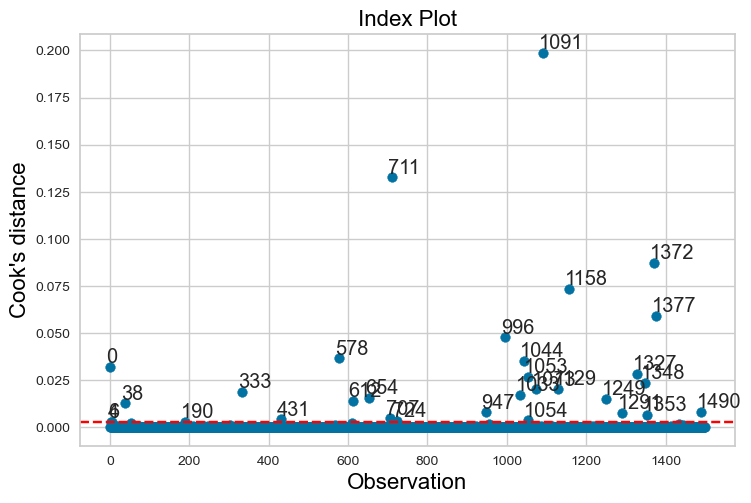

In [227]:
# Set Cook's distance threshold
cook_threshold = 4 / len(final_df)
print(f"Seuil pour la distance de Cook est = {cook_threshold}")

# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [228]:
# Trouver le nombre d'observations qui dépassent le seuil de distance de Cook

outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(final_df)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 2.1%


In [229]:
# Trouver le nombre d'observations qui sont à la fois aberrantes (écart type > 3) et très influentes

extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(final_df)),1)

In [230]:
# Afficher les 5 valeurs aberrantes les plus influentes

extreme.sort_values("cooks_d", ascending=False).head()

cooks_d  std_resid
1091  0.198804  37.599072
711   0.132525   5.411949
1372  0.087299   3.803807
1377  0.059174   3.706213

In [231]:
# Approfondirr dans l'index 297 (outlier extrême)

final_df.iloc[1091]

diagonal        172.09
height_left     104.15
height_right    104.17
is_genuine        0.00
length          113.85
margin_low        4.15
margin_up         3.40
Name: 1091, dtype: float64

Il est important de noter que les points de données présentant des distances de Cook relativement élevées ne doivent pas automatiquement être supprimés de l'ensemble de données.
Il s'agit essentiellement d'un indicateur permettant de mettre en évidence les points de données qui méritent d'être examinés plus en détail afin de déterminer s'il s'agit de véritables anomalies.
En pratique, l'évaluation des valeurs « importantes » repose sur un jugement basé sur l'expérience et sur l'ensemble de données analysé.
De plus, selon notre seuil prédéfini (4/N), seuls 5 % (51/891) des points se situent dans la zone aberrante, ce qui est également faible. Le problème survient lorsqu'un nombre important de points de données classés comme aberrants est présent.

In [233]:
# On peut en déduire que cette assomption est validée

### Assomption 4

In [235]:
# Absence de multicolinéarité

# La multicolinéarité correspond à une situation où les données contiennent des variables indépendantes fortement corrélées.
# Ceci pose problème car cela réduit la précision des coefficients estimés, ce qui affaiblit la puissance statistique du modèle de régression logistique.

In [236]:
# On avait déjà fait ce test auparavant. Cette hypothèse n'est donc pas validée

### Assomption 5

In [238]:
# Indépendance des observations

# Les observations doivent être indépendantes les unes des autres, c'est-à-dire qu'elles ne doivent pas provenir de données répétées ou appariées.
# Cela signifie que chaque observation n'est pas influencée par les autres ni liée à elles.

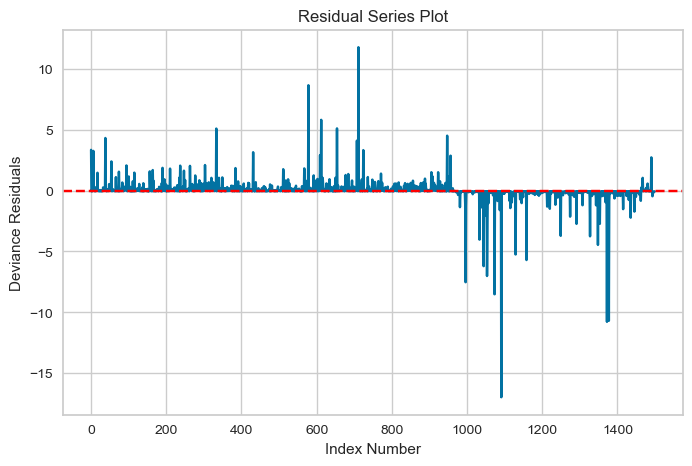

In [239]:
# Setup logistic regression model using GLM method so that we can retrieve residuals
logit_results = GLM(y, X, family=families.Binomial()).fit()

# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(final_df.index.tolist(), 
        stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')

In [240]:
# Inférence :
 
# Comme les résidus du graphique ci-dessus semblent dispersés aléatoirement autour de la ligne centrale de zéro, nous pouvons en déduire 
# (visuellement) que l'hypothèse est satisfaite.
# À partir du graphique ci-dessus, nous constatons que l'hypothèse d'indépendance des erreurs est satisfaite.

### Assomption 6

In [242]:
# Taille d'échantillon doit être suffisamment grande

# Il doit y avoir un nombre suffisant d'observations pour chaque variable indépendante dans l'ensemble de données 
# afin d'éviter de créer un modèle surajusté.

In [243]:
# Find total number of observations
print("Rows in the Dataframe :",len(final_df))

print("Categorize wise Distribution")
# Get value counts for independent variables (mainly focus on categorical)
for col in final_df.columns.to_list()[1:]:
    if final_df.dtypes[col] == 'uint8': # Keep categorical variables only
        print(final_df[col].value_counts())

Rows in the Dataframe : 1500
Categorize wise Distribution


In [244]:
# Cette hypothèse est validée

In [245]:
# Pour construire un modèle de régression logistique, nous devons d’abord sélectionner les caractéristiques qui seront utilisées 
# pour prédire la variable cible

### Selection des features pertinentes avec DecisionTreeClassifier

In [247]:
X = final_df.drop('is_genuine', axis = 1).values
y = final_df['is_genuine']

print(X.shape)
print(y.shape)

(1500, 6)
(1500,)


In [248]:
# Exécuter des estimateurs basés sur des arbres (c'est-à-dire decision trees & random forests)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [249]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df_scaled.drop('is_genuine', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for diagonal is : 0.0
The feature importance for height_left is : 0.014878683824862819
The feature importance for height_right is : 0.019427884581672286
The feature importance for margin_low is : 0.7786455065741016
The feature importance for margin_up is : 0.15960993504082163
The feature importance for length is : 0.027437989978541674


In [250]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:4]

fi_df

index       Feature  Feature Importance
0      3    margin_low            0.778646
1      4     margin_up            0.159610
2      5        length            0.027438
3      2  height_right            0.019428
4      1   height_left            0.014879
5      0      diagonal            0.000000

In [251]:
# On en déduit que les variables height_right, margin_low, length, margin_up sont les plus importantes

In [252]:
# On attribue à nos X et y les données nécessaires en retirant les variables inutiles

X = final_df.drop(["is_genuine","height_left","diagonal"], axis=1)
y = final_df["is_genuine"]

In [253]:
X

height_right  length  margin_low  margin_up
0           104.95  112.83    4.520000       2.89
1           103.66  113.09    3.770000       2.99
2           103.50  113.16    4.400000       2.94
3           103.94  113.51    3.620000       3.01
4           103.46  112.54    4.040000       3.48
...            ...     ...         ...        ...
1495        103.76  111.21    5.270433       2.93
1496        104.17  112.29    5.207590       3.40
1497        104.12  110.31    5.179511       3.61
1498        104.41  111.47    5.186196       3.56
1499        104.29  111.49    5.228983       3.24

[1500 rows x 4 columns]

In [254]:
# On appele le split

X_train ,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [255]:
predictors = ["height_right","length", "margin_low", "margin_up"]

In [256]:
# On définit notre modèle

log_reg = LogisticRegression()

In [257]:
# Entraîner le modèle

log_reg.fit(X_train[predictors], y_train)

LogisticRegression()

In [258]:
# On enregistre les prédictions dans une variable y_pred

y_pred = log_reg.predict(X_test[predictors])

In [259]:
result = log_reg.score(X_train, y_train)

### F1 score

In [261]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate F1-score

result = f1_score(y_test, y_pred)

result = round(result * 100, 2)
print("F1-Score du model est : ", "{}".format(result),"%")

F1-Score du model est :  98.99 %


In [262]:
# On traçe une matrice de confusion pour comparer la précision entre les vraies valeurs avec les valeurs prédites

cm3 = confusion_matrix(y_test, y_pred)

In [263]:
cm3

array([[ 99,   3],
       [  1, 197]], dtype=int64)

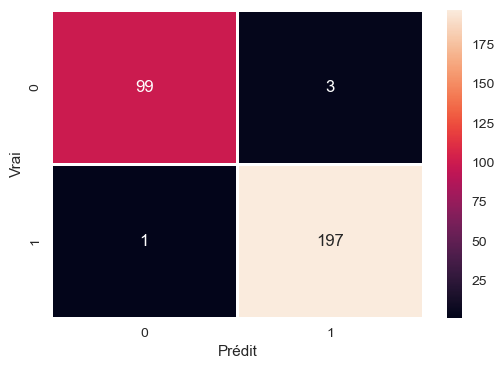

In [264]:
plt.figure(figsize=(6,4))
sns.heatmap(cm3,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

Pour l'appeler :

In [266]:
# Sauvegarder le modèle pour une utilisation future avec pickle

import pickle

# Save the model as a .pkl file
with open('logreg.pkl', 'wb') as f:
 pickle.dump(log_reg, f)
print("Model saved using Pickle!")

Model saved using Pickle!


# (2) K-means

In [268]:
# Ainsi, lorsque nous avons une variable cible à prédire en fonction d'un ensemble donné de prédicteurs ou de variables indépendantes, 
# ces problèmes sont appelés problèmes d'apprentissage supervisé.
# Il peut arriver que nous n'ayons aucune variable cible à prédire.
# De tels problèmes, sans variable cible fixe, sont appelés problèmes d'apprentissage non supervisé. Dans ces problèmes, nous n'avons que 
# des variables indépendantes et aucune variable cible/dépendante.

In [269]:
from sklearn.cluster import KMeans

In [270]:
X = df_scaled.drop("is_genuine", axis=1)

y = df_scaled["is_genuine"]

In [271]:
X

diagonal  height_left  height_right  margin_low  margin_up    length
0     0.390863     0.988506      1.000000    0.392857   0.378049  0.674747
1     0.213198     0.126437      0.394366    0.201531   0.439024  0.727273
2     0.837563     0.770115      0.319249    0.362245   0.408537  0.741414
3     0.162437     0.442529      0.525822    0.163265   0.451220  0.812121
4     0.350254     0.655172      0.300469    0.270408   0.737805  0.616162
...        ...          ...           ...         ...        ...       ...
1495  0.573604     0.775862      0.441315    0.584294   0.402439  0.347475
1496  0.527919     0.580460      0.633803    0.568263   0.689024  0.565657
1497  0.345178     0.758621      0.610329    0.561100   0.817073  0.165657
1498  0.822335     0.683908      0.746479    0.562805   0.786585  0.400000
1499  0.436548     0.655172      0.690141    0.573720   0.591463  0.404040

[1500 rows x 6 columns]

In [272]:
# On crée notre train set et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [273]:
X_train.shape

(1200, 6)

In [274]:
X_test.shape

(300, 6)

In [275]:
preds = ["diagonal", "height_left", "height_right","margin_low", "margin_up", "length"]

On avait déjà choisi que le nombre optimal de clusters était 2 

In [277]:
# On affecte notre KMeans à notre variable km

km = KMeans(n_clusters= 2, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state= 2)

In [278]:
km.fit(X_train[preds])

KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=2)

In [279]:
# On réalise notre prediction que l'on va stocker dans une variable

prediction = km.predict(X_test[preds])

In [280]:
# On crée une colonne dans notre table en ajoutant les labels calculé par le model

X_test["cluster"] = prediction

In [281]:
X_test.head()

diagonal  height_left  height_right  margin_low  margin_up    length  \
471   0.558376     0.442529      0.389671    0.308673   0.585366  0.818182   
9     0.725888     0.534483      0.563380    0.270408   0.597561  0.800000   
1499  0.436548     0.655172      0.690141    0.573720   0.591463  0.404040   
54    0.497462     0.252874      0.460094    0.247449   0.725610  0.587879   
1411  0.355330     0.678161      0.384977    0.635204   0.615854  0.418182   

      cluster  
471         1  
9           1  
1499        0  
54          1  
1411        0

### F1 score

In [283]:
# Calculate F1-score

res4 = f1_score(y_test, X_test["cluster"])

res4 = round(res4 * 100, 2)
print("F1-Score du model est : ", "{}".format(res4),"%")

F1-Score du model est :  98.49 %


In [284]:
# On traçe une matrice de confusion

cm1 = confusion_matrix(y_test, X_test["cluster"])

In [285]:
cm1

array([[ 98,   4],
       [  2, 196]], dtype=int64)

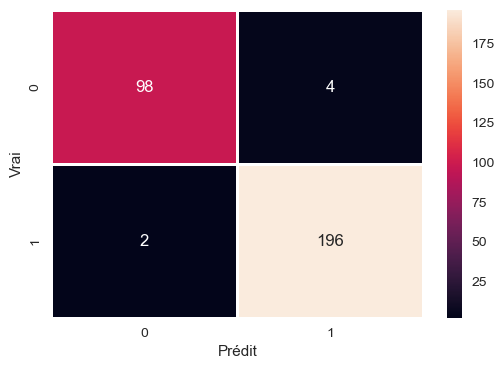

In [286]:
plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [287]:
# Sauvegarder le modèle pour une utilisation future avec pickle

import pickle

# Save the model as a .pkl file
with open('km_model.pkl', 'wb') as f:
 pickle.dump(km, f)
print("Model saved using Pickle!")

Model saved using Pickle!


# (3) KNeighborsClassifier (KNN)

In [289]:
from sklearn.neighbors import KNeighborsClassifier 

In [290]:
# On affecte à nos X et y 

X = final_df.drop("is_genuine", axis=1)

y = final_df["is_genuine"]

In [291]:
X

diagonal  height_left  height_right  length  margin_low  margin_up
0       171.81       104.86        104.95  112.83    4.520000       2.89
1       171.46       103.36        103.66  113.09    3.770000       2.99
2       172.69       104.48        103.50  113.16    4.400000       2.94
3       171.36       103.91        103.94  113.51    3.620000       3.01
4       171.73       104.28        103.46  112.54    4.040000       3.48
...        ...          ...           ...     ...         ...        ...
1495    172.17       104.49        103.76  111.21    5.270433       2.93
1496    172.08       104.15        104.17  112.29    5.207590       3.40
1497    171.72       104.46        104.12  110.31    5.179511       3.61
1498    172.66       104.33        104.41  111.47    5.186196       3.56
1499    171.90       104.28        104.29  111.49    5.228983       3.24

[1500 rows x 6 columns]

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [293]:
X_train.shape

(1200, 6)

In [294]:
X_test.shape

(300, 6)

In [295]:
len(X_train)

1200

In [296]:
len(y_test)

300

In [297]:
predictors = ["diagonal", "height_left", "height_right","length", "margin_low", "margin_up"]

In [298]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train[predictors], y_train)

KNeighborsClassifier(n_neighbors=3)

In [299]:
y_pred = knn.predict(X_test[predictors])

In [300]:
print(y_pred)

[1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1
 1 0 0 1]


### F1 score

In [302]:
# Calculate F1-score

res = f1_score(y_test, y_pred)

res = round(res * 100, 2)
print("F1-Score du model est : ", "{}".format(res),"%")

F1-Score du model est :  98.99 %


In [303]:
# Matrice de Confusion

cm_ = confusion_matrix(y_test, y_pred)

In [304]:
cm_

array([[ 99,   3],
       [  1, 197]], dtype=int64)

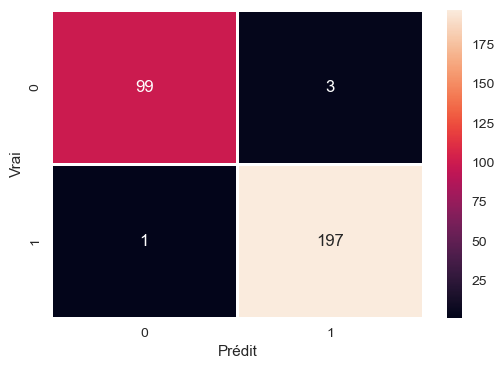

In [305]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [306]:
# Sauvegarder le modèle pour une utilisation future avec joblib

import joblib  

joblib.dump(knn, "knn_joblib")

['knn_joblib']

In [307]:
# new_knn = joblib.load("knn_joblib")

# Random Forest

In [309]:
from sklearn import set_config
set_config(transform_output="pandas")

In [310]:
X = final_df.drop("is_genuine", axis=1)

y = final_df["is_genuine"]

In [311]:
X

diagonal  height_left  height_right  length  margin_low  margin_up
0       171.81       104.86        104.95  112.83    4.520000       2.89
1       171.46       103.36        103.66  113.09    3.770000       2.99
2       172.69       104.48        103.50  113.16    4.400000       2.94
3       171.36       103.91        103.94  113.51    3.620000       3.01
4       171.73       104.28        103.46  112.54    4.040000       3.48
...        ...          ...           ...     ...         ...        ...
1495    172.17       104.49        103.76  111.21    5.270433       2.93
1496    172.08       104.15        104.17  112.29    5.207590       3.40
1497    171.72       104.46        104.12  110.31    5.179511       3.61
1498    172.66       104.33        104.41  111.47    5.186196       3.56
1499    171.90       104.28        104.29  111.49    5.228983       3.24

[1500 rows x 6 columns]

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [313]:
X_train.shape

(1200, 6)

In [314]:
X_test.shape

(300, 6)

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
rf = RandomForestClassifier(random_state=21)

In [317]:
predictors = ["diagonal", "height_left", "height_right","length", "margin_low", "margin_up"]

In [318]:
rf.fit(X_train[predictors], y_train)

RandomForestClassifier(random_state=21)

In [319]:
y_pred = rf.predict(X_test[predictors]) 

### F1 score

In [321]:
# Calculate F1-score

res3 = f1_score(y_test, y_pred)

res3 = round(res3 * 100, 2)
print("F1-Score du model est : ", "{}".format(res3),"%")

F1-Score du model est :  99.24 %


In [322]:
from sklearn.metrics import classification_report

In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.99      0.99      0.99       198

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [324]:
# On visualise l'importance de chaque features par dans le model

features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [325]:
features

0
diagonal      0.009236
height_left   0.032545
height_right  0.075257
length        0.466953
margin_low    0.289948
margin_up     0.126060

In [326]:
cm2 = confusion_matrix(y_test, y_pred)

In [327]:
cm2

array([[100,   2],
       [  1, 197]], dtype=int64)

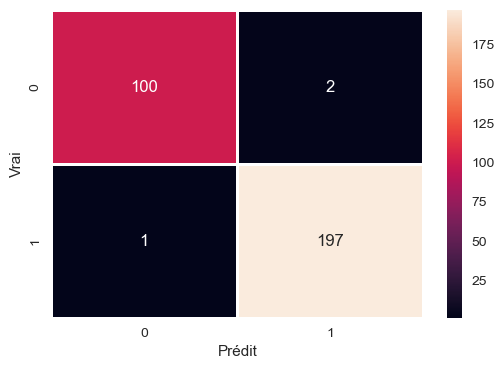

In [328]:
plt.figure(figsize=(6,4))
sns.heatmap(cm2,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [329]:
# Sauvegarder le modèle pour une utilisation future avec pickle

import pickle

# Save the model as a .pkl file
with open('random_forest_model.pkl', 'wb') as f:
 pickle.dump(rf, f)
print("Model saved using Pickle!")

Model saved using Pickle!


# Decision Tree

In [331]:
X = final_df.drop("is_genuine", axis=1)

y = final_df["is_genuine"]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [333]:
predictors = ["diagonal", "height_left", "height_right","length", "margin_low", "margin_up"]

In [334]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
dtc = DecisionTreeClassifier()

In [336]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [337]:
dtc.fit(X_train[predictors], y_train)

DecisionTreeClassifier()

In [338]:
y_pred = dtc.predict(X_test[predictors]) 

In [339]:
cm4 = confusion_matrix(y_test, y_pred)

In [340]:
cm4

array([[100,   2],
       [  5, 193]], dtype=int64)

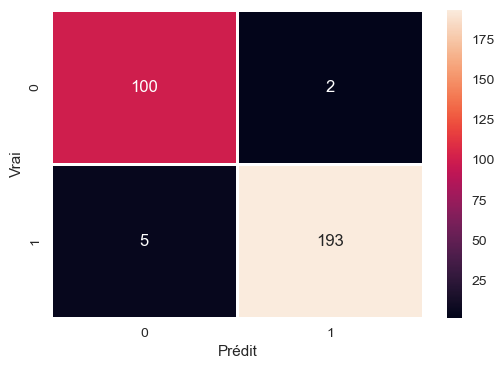

In [341]:
plt.figure(figsize=(6,4))
sns.heatmap(cm4,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [342]:
dtc.feature_importances_

array([0.00000000e+00, 1.98147418e-04, 3.57147333e-03, 8.38222465e-01,
       1.30910129e-01, 2.70977858e-02])

In [343]:
X.columns

Index(['diagonal', 'height_left', 'height_right', 'length', 'margin_low',
       'margin_up'],
      dtype='object')

In [344]:
# On visualise l'importance de chaque features par dans le model

features = pd.DataFrame(dtc.feature_importances_, index = X.columns)

In [345]:
features

0
diagonal      0.000000
height_left   0.000198
height_right  0.003571
length        0.838222
margin_low    0.130910
margin_up     0.027098

In [346]:
dtc2 = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0.04)

In [347]:
dtc2.fit(X_train[predictors], y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [348]:
y_pred = dtc2.predict(X_test[predictors]) 

In [349]:
cm5 = confusion_matrix(y_test, y_pred)

In [350]:
cm5

array([[ 99,   3],
       [  2, 196]], dtype=int64)

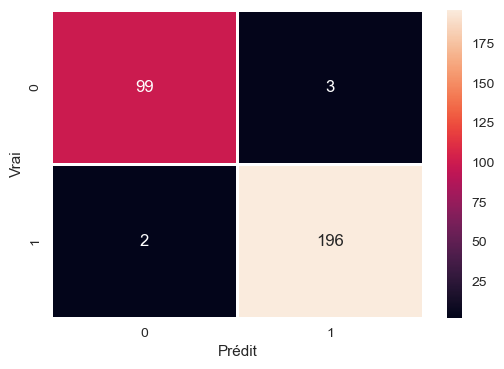

In [351]:
plt.figure(figsize=(6,4))
sns.heatmap(cm5,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

# Gradient Boosting

In [353]:
# is a machine learning algorithm that can be used for regression and classification 

In [354]:
X = final_df.drop("is_genuine", axis=1)

y = final_df["is_genuine"]

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [356]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [357]:
gbr = GradientBoostingClassifier()

In [358]:
gbr.fit(X_train[predictors], y_train)

GradientBoostingClassifier()

In [359]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.9891666666666667

In [360]:
param_grid = {
    "n_estimators" : [10, 50, 100, 150],
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_depth" : [3, 5, 7, 9]
}

In [361]:
from sklearn.model_selection import GridSearchCV

In [362]:
gbr2 = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1)

In [363]:
gbr2.fit(X_train[predictors], y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 150]})

In [364]:
gbr2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [365]:
gbr2.best_score_

0.9908333333333333

In [366]:
gbr.predict(X_test[predictors])

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], d

In [367]:
gbr2.predict(X_test[predictors])

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], d

In [368]:
cm6 = confusion_matrix(y_test, y_pred)

In [369]:
cm6

array([[ 99,   3],
       [  2, 196]], dtype=int64)

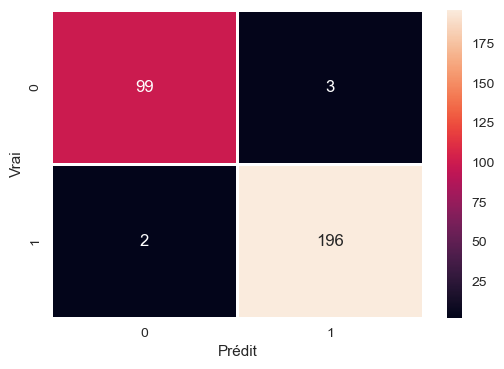

In [370]:
plt.figure(figsize=(6,4))
sns.heatmap(cm6,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [371]:
# Save the model as a .pkl file
with open('gbr2_model.pkl', 'wb') as f:
 pickle.dump(gbr2, f)
print("Model saved using Pickle!")

Model saved using Pickle!


# XG Boost

In [373]:
X = final_df.drop("is_genuine", axis=1)

y = final_df["is_genuine"]

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Step 2: Build a pipeline of training

In [376]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Step 3: Set up hyperparameter tuning

In [378]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

### Step 4: Train the XGBoost model

In [380]:
opt.fit(X_train[predictors], y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

### Step 5: Evaluate the model and make predictions

In [382]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.7160044460033754,
                               colsample_bynode=0.5634842539270097,
                               colsample_bytree=0.8894150401192538, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamm..., grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.006917774244564682, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [383]:
opt.best_score_

0.9988803244549205

In [384]:
opt.score(X_test, y_test)

0.999108734402852

In [385]:
opt.predict(X_test[predictors])

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

### Step 6: Measure feature importance (optional)

In [387]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.7160044460033754,
                colsample_bynode=0.5634842539270097,
                colsample_bytree=0.8894150401192538, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=0.12840880628708476, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.006917774244564682,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

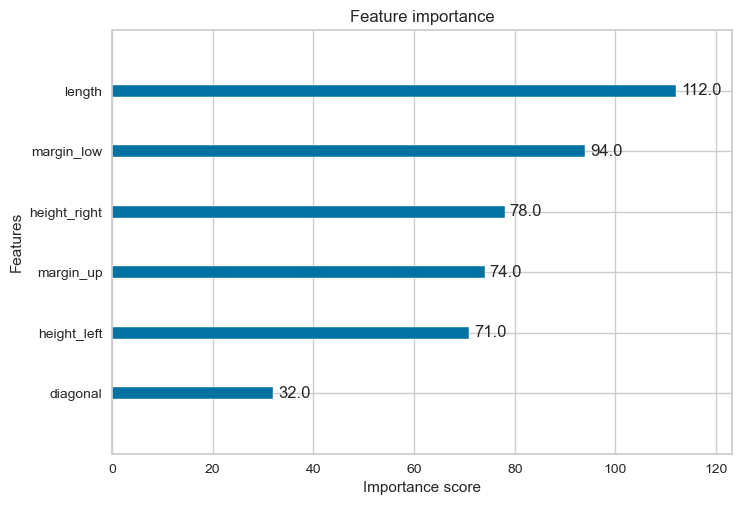

In [388]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [389]:
# Save the model as a .pkl file
with open('opt_model.pkl', 'wb') as f:
 pickle.dump(opt, f)
print("Model saved using Pickle!")

Model saved using Pickle!


### Le choix final

<div style="color: RGB(0,150,250)">
<h3>Régression Logistique : 98.99%</h3>

<div style="color: RGB(0,150,250)">
<h3> K-Means : 98.49%  </h3>

<div style="color: RGB(0,150,250)">
<h3>KNN : 98.99%</h3>

<div style="color: RGB(0,150,250)">
<h3>Random Forest : 99.24%</h3>

***Après avoir travaillé sur ces 4 algorithmes, je retiens RANDOM FOREST car c'est celui qui a le plus grand F1 score***